### 실제 해지 데이터를 제공받았음 (2025-02-07)

- 우리가 만든 해지 데이터와 실제 해지 데이터를 비교해보자.

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import operator
import math
import warnings
import openpyxl
import random
warnings.filterwarnings('ignore')
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score
import tensorflow as tf
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import CondensedNearestNeighbour
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
import pandas as pd

In [2]:
# 한글 글꼴체 변경
plt.rcParams['font.family'] ='Malgun Gothic'
# df.head() 이런거 했을 때, 컬럼이 생략되지 않고, 모든 컬럼 뜨게
pd.set_option('display.max_columns', None)
# 지수 표기법 대신에 소수점으로 표시하는코드
pd.options.display.float_format = '{:.2f}'.format
# 값 길이 제한 X
pd.set_option('display.max_colwidth', None) # 값 길이 제한 없음

팀 회의를 거쳐 만든 해지 컬럼을 가진 데이터 (해당 데이터를 가지고 프로젝트를 진행)

In [3]:
df_making_churn = pd.read_csv("data/TPS_cancel_202302_202312.csv")

In [4]:
df_making_churn

,sha2_hash,SVC_USE_DAYS_GRP,MEDIA_NM_GRP,PROD_NM_GRP,PROD_OLD_YN,PROD_ONE_PLUS_YN,AGMT_KIND_NM,STB_RES_1M_YN,SVOD_SCRB_CNT_GRP,PAID_CHNL_CNT_GRP,SCRB_PATH_NM_GRP,INHOME_RATE,AGMT_END_SEG,AGMT_END_YMD,TOTAL_USED_DAYS,TV_SCRB,ANALOG_SCRB,DIGITAL_SCRB,TOTAL_INTERNET_SCRB,GIGA_INTERNET_SCRB,BUNDLE_YN,DIGITAL_GIGA_YN,DIGITAL_ALOG_YN,TV_I_CNT,CH_LAST_DAYS_BF_GRP,VOC_TOTAL_MONTH1_YN,VOC_STOP_CANCEL_MONTH1_YN,AGE_GRP10,EMAIL_RECV_CLS_NM,SMS_SEND_CLS_NM,CH_HH_AVG_MONTH1,CH_25_RATIO_MONTH1,CH_25_RATIO_MEAN_3MM,CH_FAV_RNK1,KIDS_USE_PV_MONTH1,NFX_USE_YN,YTB_USE_YN,p_mt,churn
0,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,12개월~24개월미만,HD,이코노미,N,Y,신규,N,0건,0건,I/B,10.0,약정만료전 12개월이상,20240325,733,2.00,0.00,2.00,1.00,1.00,Y,Y,N,3.00,3개월내없음,N,N,60대,수신,수신,0.00,0.00,0.00,기타,0.00,N,N,2,N
1,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,24개월~ 36개월미만,HD,이코노미,N,Y,신규,Y,0건,0건,I/B,0.0,약정만료전 9~12개월,20240325,764,2.00,0.00,2.00,1.00,1.00,Y,Y,N,3.00,일주일내,Y,N,60대,수신,수신,6.72,3.33,3.33,JTBC,0.00,N,N,3,N
2,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,24개월~ 36개월미만,HD,이코노미,N,Y,신규,N,0건,0건,I/B,10.0,약정만료전 9~12개월,20240325,794,2.00,0.00,2.00,1.00,1.00,Y,Y,N,3.00,3주일전,N,N,60대,수신,수신,9.86,3.71,3.71,기타,0.00,N,N,4,N
3,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,24개월~ 36개월미만,HD,이코노미,N,Y,신규,N,0건,0건,I/B,10.0,약정만료전 9~12개월,20240325,825,2.00,0.00,2.00,1.00,1.00,Y,Y,N,3.00,4주일전,N,N,60대,수신,수신,5.95,3.57,3.57,기타,0.00,N,N,5,N
4,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,24개월~ 36개월미만,HD,이코노미,N,Y,신규,N,0건,0건,I/B,0.0,약정만료전 6~9개월,20240325,855,2.00,0.00,2.00,1.00,1.00,Y,Y,N,3.00,일주일내,N,N,60대,수신,수신,4.03,6.51,6.51,기타,0.00,N,N,6,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22476020,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,36개월 이상,HD,베이직,N,N,신규,N,0건,0건,현장경로,10.0,약정만료후 12개월이상,20200405,2338,1.00,0.00,1.00,0.00,0.00,N,N,N,1.00,일주일내,N,N,50대,수신,수신,2.03,0.01,0.01,KBS1,0.00,N,N,8,N
22476021,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,36개월 이상,HD,베이직,N,N,신규,N,0건,0건,현장경로,10.0,약정만료후 12개월이상,20200405,2368,1.00,0.00,1.00,0.00,0.00,N,N,N,1.00,일주일내,N,N,50대,수신,수신,2.91,0.00,0.00,기타,1.00,N,N,9,N
22476022,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,36개월 이상,HD,베이직,N,N,신규,N,0건,0건,현장경로,10.0,약정만료후 12개월이상,20200405,2399,1.00,0.00,1.00,0.00,0.00,N,N,N,1.00,2주일전,Y,N,50대,수신,수신,1.97,0.19,0.19,기타,0.00,N,N,10,N
22476023,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,36개월 이상,HD,베이직,N,N,신규,N,0건,0건,현장경로,0.0,약정만료후 12개월이상,20200405,2429,1.00,0.00,1.00,0.00,0.00,N,N,N,1.00,3개월내없음,N,N,50대,수신,수신,0.00,0.00,0.00,기타,0.00,N,N,11,N


In [6]:
df_making_churn.isnull().sum()

sha2_hash                    0
SVC_USE_DAYS_GRP             0
MEDIA_NM_GRP                 0
PROD_NM_GRP                  0
PROD_OLD_YN                  0
PROD_ONE_PLUS_YN             0
AGMT_KIND_NM                 0
STB_RES_1M_YN                0
SVOD_SCRB_CNT_GRP            0
PAID_CHNL_CNT_GRP            0
SCRB_PATH_NM_GRP             0
INHOME_RATE                  0
AGMT_END_SEG                 0
AGMT_END_YMD                 0
TOTAL_USED_DAYS              0
TV_SCRB                      0
ANALOG_SCRB                  0
DIGITAL_SCRB                 0
TOTAL_INTERNET_SCRB          0
GIGA_INTERNET_SCRB           0
BUNDLE_YN                    0
DIGITAL_GIGA_YN              0
DIGITAL_ALOG_YN              0
TV_I_CNT                     0
CH_LAST_DAYS_BF_GRP          0
VOC_TOTAL_MONTH1_YN          0
VOC_STOP_CANCEL_MONTH1_YN    0
AGE_GRP10                    0
EMAIL_RECV_CLS_NM            0
SMS_SEND_CLS_NM              0
CH_HH_AVG_MONTH1             0
CH_25_RATIO_MONTH1           0
CH_25_RA

### 실제 해지 데이터를 불러와보자
  - 실제 데이터는 프로젝트 종료 2주전인 2월 중순에 지급됨. 그래서 해당 데이터로 다시 프로젝트를 진행하기에 무리라고 판단.

In [3]:
df_2 = pd.read_csv("data/sha_tps_cancel_202311_to_202312/sha_tps_cancel_202302_to_202304.csv")

In [4]:
df_5 = pd.read_csv("data/sha_tps_cancel_202311_to_202312/sha_tps_cancel_202305_to_202307.csv")

In [5]:
df_8 = pd.read_csv("data/sha_tps_cancel_202311_to_202312/sha_tps_cancel_202308_to_202310.csv")

In [6]:
df_11 = pd.read_csv("data/sha_tps_cancel_202311_to_202312/sha_tps_cancel_202311_to_202312.csv")

In [7]:
df_real_churn = pd.concat([df_2, df_5, df_8, df_11], axis=0, ignore_index=True)

In [9]:
df_real_churn

,sha2_hash,SVC_USE_DAYS_GRP,MEDIA_NM_GRP,PROD_NM_GRP,PROD_OLD_YN,PROD_ONE_PLUS_YN,AGMT_KIND_NM,STB_RES_1M_YN,SVOD_SCRB_CNT_GRP,PAID_CHNL_CNT_GRP,SCRB_PATH_NM_GRP,INHOME_RATE,AGMT_END_SEG,AGMT_END_YMD,TOTAL_USED_DAYS,TV_SCRB,ANALOG_SCRB,DIGITAL_SCRB,TOTAL_INTERNET_SCRB,GIGA_INTERNET_SCRB,BUNDLE_YN,DIGITAL_GIGA_YN,DIGITAL_ALOG_YN,TV_I_CNT,CH_LAST_DAYS_BF_GRP,VOC_TOTAL_MONTH1_YN,VOC_STOP_CANCEL_MONTH1_YN,AGE_GRP10,EMAIL_RECV_CLS_NM,SMS_SEND_CLS_NM,CH_HH_AVG_MONTH1,CH_25_RATIO_MONTH1,CH_25_RATIO_MEAN_3MM,CH_FAV_RNK1,KIDS_USE_PV_MONTH1,NFX_USE_YN,YTB_USE_YN,p_mt,cancel_yn
0,6c2fb1fb0b1e316975157671e03d0e2eb3d250a73733215446d5b0272982c19e,6개월미만,UHD,이코노미,N,N,신규,N,0건,0건,직영몰,10.0,약정만료전 12개월이상,20260213,45,1.00,0.00,1.00,0.00,0.00,N,N,N,1.00,일주일내,Y,N,50대,전체거부,전체거부,4.46,3.63,3.63,기타,2.00,N,N,202303,유지
1,39b9ff560dbcbe4e138f04fd082d55d921c5528f1cc279fa3483fb4b2438aa1a,6개월미만,UHD,베이직,N,N,신규,N,0건,0건,현장경로,10.0,약정만료전 12개월이상,20260213,45,1.00,0.00,1.00,1.00,1.00,Y,Y,N,2.00,일주일내,Y,N,70대,수신,수신,4.57,5.67,5.67,MBC,1.00,N,N,202303,유지
2,db168b085b5c0cd2d21faab70ceb4ec36c5409aea1f8f451c778c5c4c988f323,6개월미만,UHD,베이직,N,N,신규,N,0건,0건,현장경로,20.0,약정만료전 12개월이상,20260214,44,1.00,0.00,1.00,1.00,1.00,Y,Y,N,2.00,일주일내,Y,N,70대,전체거부,수신,6.32,0.36,0.36,기타,0.00,N,N,202303,유지
3,59a02dfe6d4e5e4ffc1b295dc0ebf0fdf7ffc37321f6531580d74136670283b4,6개월미만,HD,이코노미,N,Y,신규,N,0건,0건,I/B,0.0,약정만료전 12개월이상,20260214,3006,2.00,0.00,2.00,1.00,0.00,Y,N,N,3.00,일주일내,Y,N,40대,수신,수신,1.18,1.85,1.85,SBS,0.00,N,N,202303,유지
4,6f415993f9b6968f3b7bd8b2188f8651dfdc7e50e3022af61fbf5b3259aad4c3,6개월미만,UHD,베이직,N,N,신규,N,0건,0건,현장경로,10.0,약정만료전 12개월이상,20260216,42,1.00,0.00,1.00,1.00,0.00,Y,N,N,2.00,일주일내,Y,N,60대,전체거부,전체거부,3.05,0.55,0.55,연합뉴스TV,0.00,N,Y,202303,유지
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22893466,c328cd00e3df5c2c0c96172b75d83c9ab0001fcf31eede365d8e4d1c53ce7e4f,36개월 이상,HD,베이직,N,N,재약정,N,0건,1건,일반상담,30.0,약정만료후 12개월이상,20220428,4121,1.00,0.00,1.00,1.00,0.00,Y,N,N,2.00,일주일내,N,N,40대,전체거부,전체거부,6.44,0.05,0.05,JTBC,0.00,N,N,202311,유지
22893467,600bfa2713b7fefc620019ace38e422e2b8c4f94b741bcc63c8f8ba0778ee0ed,36개월 이상,HD,베이직,N,N,신규,N,0건,0건,O/B,30.0,약정만료후 12개월이상,20160508,3857,2.00,0.00,2.00,0.00,0.00,N,N,N,2.00,일주일내,N,N,70대,전체거부,전체거부,4.46,4.02,4.02,KBS1,0.00,N,N,202311,유지
22893468,2de2f8e401ba675cbec6d83cb027ffd70279f3d2b99e4ad4cb9cbc1525d0aba8,36개월 이상,HD,베이직,N,N,재약정,N,0건,0건,O/B,70.0,약정만료후 12개월이상,20181102,3751,1.00,0.00,1.00,0.00,0.00,N,N,N,1.00,일주일내,N,N,90대이상,전체거부,수신,15.79,0.71,0.71,KBS1,0.00,N,N,202311,유지
22893469,ec341bf8a50750a03ee46c25a7ac78423a6ce632093c66a62b5017c41e0d7ea7,36개월 이상,HD,프리미엄,N,N,약정승계,N,0건,0건,O/B,10.0,약정만료후 12개월이상,20170526,2858,2.00,0.00,2.00,2.00,0.00,Y,N,N,4.00,일주일내,N,N,40대,수신,수신,1.30,0.04,0.04,JTBC,0.00,N,N,202311,유지


확인해보자

In [11]:
df_real_churn['cancel_yn'].value_counts()

cancel_yn
유지    21583829
해지     1309642
Name: count, dtype: int64

In [12]:
# 비율
df_real_churn['cancel_yn'].value_counts(normalize=True)

cancel_yn
유지   0.94
해지   0.06
Name: proportion, dtype: float64

In [13]:
# 비율
df_making_churn['churn'].value_counts(normalize=True)

churn
N   0.99
Y   0.01
Name: proportion, dtype: float64

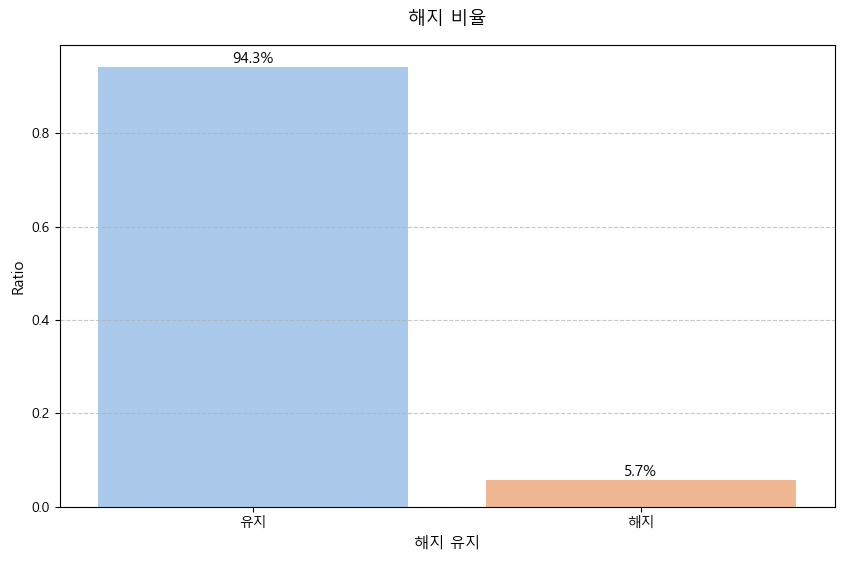

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=df_real_churn['cancel_yn'].value_counts(normalize=True).index, 
                 y=df_real_churn['cancel_yn'].value_counts(normalize=True).values,
                 palette='pastel')

plt.title('해지 비율', fontsize=13, pad=15)
plt.xlabel('해지 유지', fontsize=11)
plt.ylabel('Ratio', fontsize=11)

# 막대 위에 퍼센트 표시
for i, v in enumerate(df_real_churn['cancel_yn'].value_counts(normalize=True)):
    ax.text(i, v, f'{v:.1%}', ha='center', va='bottom', fontsize=11)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [15]:
# 우리가 만든 데이터
df_making_churn['churn'] = df_making_churn['churn'].map({"Y" : "해지", "N" : "유지"})

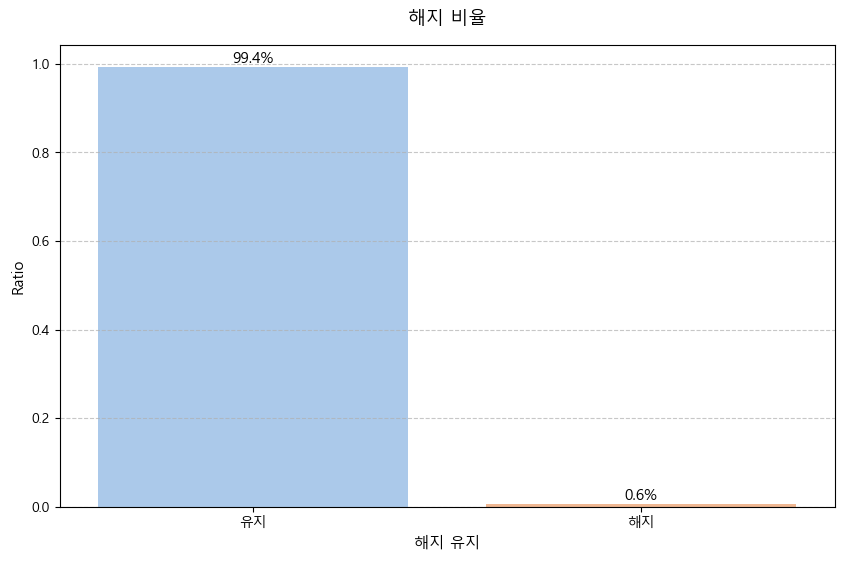

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=df_making_churn['churn'].value_counts(normalize=True).index, 
                 y=df_making_churn['churn'].value_counts(normalize=True).values,
                 palette='pastel')

plt.title('해지 비율', fontsize=13, pad=15)
plt.xlabel('해지 유지', fontsize=11)
plt.ylabel('Ratio', fontsize=11)

# 막대 위에 퍼센트 표시
for i, v in enumerate(df_making_churn['churn'].value_counts(normalize=True)):
    ax.text(i, v, f'{v:.1%}', ha='center', va='bottom', fontsize=11)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

얘네 해지의 특징을 봐보자

In [9]:
df_real_churn = df_real_churn.sort_values(by = ['sha2_hash', 'p_mt'], ascending = [True, True])

In [18]:
df_real_churn.head(15)

,sha2_hash,SVC_USE_DAYS_GRP,MEDIA_NM_GRP,PROD_NM_GRP,PROD_OLD_YN,PROD_ONE_PLUS_YN,AGMT_KIND_NM,STB_RES_1M_YN,SVOD_SCRB_CNT_GRP,PAID_CHNL_CNT_GRP,SCRB_PATH_NM_GRP,INHOME_RATE,AGMT_END_SEG,AGMT_END_YMD,TOTAL_USED_DAYS,TV_SCRB,ANALOG_SCRB,DIGITAL_SCRB,TOTAL_INTERNET_SCRB,GIGA_INTERNET_SCRB,BUNDLE_YN,DIGITAL_GIGA_YN,DIGITAL_ALOG_YN,TV_I_CNT,CH_LAST_DAYS_BF_GRP,VOC_TOTAL_MONTH1_YN,VOC_STOP_CANCEL_MONTH1_YN,AGE_GRP10,EMAIL_RECV_CLS_NM,SMS_SEND_CLS_NM,CH_HH_AVG_MONTH1,CH_25_RATIO_MONTH1,CH_25_RATIO_MEAN_3MM,CH_FAV_RNK1,KIDS_USE_PV_MONTH1,NFX_USE_YN,YTB_USE_YN,p_mt,cancel_yn
3086123,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,12개월~24개월미만,HD,이코노미,N,Y,신규,N,0건,0건,I/B,10.0,약정만료전 12개월이상,20240325,733,2.00,0.00,2.00,1.00,1.00,Y,Y,N,3.00,3개월내없음,N,N,60대,수신,수신,0.00,0.00,0.00,기타,0.00,N,N,202302,유지
2052758,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,24개월~ 36개월미만,HD,이코노미,N,Y,신규,Y,0건,0건,I/B,0.0,약정만료전 9~12개월,20240325,764,2.00,0.00,2.00,1.00,1.00,Y,Y,N,3.00,일주일내,Y,N,60대,수신,수신,6.72,3.33,3.33,JTBC,0.00,N,N,202303,유지
489660,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,24개월~ 36개월미만,HD,이코노미,N,Y,신규,N,0건,0건,I/B,10.0,약정만료전 9~12개월,20240325,794,2.00,0.00,2.00,1.00,1.00,Y,Y,N,3.00,3주일전,N,N,60대,수신,수신,9.86,3.71,3.71,기타,0.00,N,N,202304,유지
9808529,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,24개월~ 36개월미만,HD,이코노미,N,Y,신규,N,0건,0건,I/B,10.0,약정만료전 9~12개월,20240325,825,2.00,0.00,2.00,1.00,1.00,Y,Y,N,3.00,4주일전,N,N,60대,수신,수신,5.95,3.57,3.57,기타,0.00,N,N,202305,유지
11736823,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,24개월~ 36개월미만,HD,이코노미,N,Y,신규,N,0건,0건,I/B,0.0,약정만료전 6~9개월,20240325,855,2.00,0.00,2.00,1.00,1.00,Y,Y,N,3.00,일주일내,N,N,60대,수신,수신,4.03,6.51,6.51,기타,0.00,N,N,202306,유지
7578068,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,24개월~ 36개월미만,HD,이코노미,N,Y,신규,N,0건,0건,I/B,0.0,약정만료전 6~9개월,20240325,886,2.00,0.00,2.00,1.00,1.00,Y,Y,N,3.00,일주일내,Y,N,60대,수신,수신,2.93,0.00,0.00,KBS1,0.00,N,N,202307,유지
15785652,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,24개월~ 36개월미만,HD,이코노미,N,Y,재약정,N,0건,0건,I/B,10.0,약정만료전 12개월이상,20260820,917,3.00,0.00,3.00,1.00,1.00,Y,Y,N,4.00,일주일내,Y,Y,60대,수신,수신,5.34,0.03,0.03,JTBC,0.00,N,N,202308,유지
18390039,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,24개월~ 36개월미만,HD,이코노미,N,Y,재약정,N,0건,0건,I/B,10.0,약정만료전 12개월이상,20260820,947,2.00,0.00,2.00,1.00,1.00,Y,Y,N,3.00,일주일내,N,N,60대,수신,수신,4.28,6.46,6.46,기타,0.00,N,N,202309,유지
14871033,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,24개월~ 36개월미만,HD,이코노미,N,Y,재약정,N,0건,0건,I/B,20.0,약정만료전 12개월이상,20260820,978,2.00,0.00,2.00,1.00,1.00,Y,Y,N,3.00,일주일내,N,N,60대,수신,수신,3.66,8.67,8.67,기타,0.00,N,N,202310,유지
20577177,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,24개월~ 36개월미만,HD,이코노미,N,Y,재약정,N,0건,0건,I/B,20.0,약정만료전 12개월이상,20260820,1008,2.00,0.00,2.00,1.00,1.00,Y,Y,N,3.00,일주일내,N,N,60대,수신,수신,6.23,4.72,4.72,기타,0.00,N,N,202311,유지


In [19]:
df_real_churn[df_real_churn['cancel_yn'] == '해지']

,sha2_hash,SVC_USE_DAYS_GRP,MEDIA_NM_GRP,PROD_NM_GRP,PROD_OLD_YN,PROD_ONE_PLUS_YN,AGMT_KIND_NM,STB_RES_1M_YN,SVOD_SCRB_CNT_GRP,PAID_CHNL_CNT_GRP,SCRB_PATH_NM_GRP,INHOME_RATE,AGMT_END_SEG,AGMT_END_YMD,TOTAL_USED_DAYS,TV_SCRB,ANALOG_SCRB,DIGITAL_SCRB,TOTAL_INTERNET_SCRB,GIGA_INTERNET_SCRB,BUNDLE_YN,DIGITAL_GIGA_YN,DIGITAL_ALOG_YN,TV_I_CNT,CH_LAST_DAYS_BF_GRP,VOC_TOTAL_MONTH1_YN,VOC_STOP_CANCEL_MONTH1_YN,AGE_GRP10,EMAIL_RECV_CLS_NM,SMS_SEND_CLS_NM,CH_HH_AVG_MONTH1,CH_25_RATIO_MONTH1,CH_25_RATIO_MEAN_3MM,CH_FAV_RNK1,KIDS_USE_PV_MONTH1,NFX_USE_YN,YTB_USE_YN,p_mt,cancel_yn
4340099,00013f61ac45a4b8cb3455eaff826daaf5f887ebea8546a0428972c758953d64,36개월 이상,HD,베이직,N,N,신규,N,0건,0건,현장경로,20.0,약정만료후 12개월이상,20170520,3205,1.00,0.00,1.00,0.00,0.00,N,N,N,1.00,일주일내,N,N,50대,전체거부,전체거부,2.99,10.24,10.24,기타,0.00,N,N,202302,해지
5632454,00013f61ac45a4b8cb3455eaff826daaf5f887ebea8546a0428972c758953d64,36개월 이상,HD,베이직,N,N,신규,N,0건,0건,현장경로,20.0,약정만료후 12개월이상,20170520,3236,1.00,0.00,1.00,0.00,0.00,N,N,N,1.00,일주일내,N,N,50대,전체거부,전체거부,2.86,0.02,0.02,tvN,0.00,N,N,202303,해지
2543778,00013f61ac45a4b8cb3455eaff826daaf5f887ebea8546a0428972c758953d64,36개월 이상,HD,베이직,N,N,신규,N,0건,0건,현장경로,20.0,약정만료후 12개월이상,20170520,3266,1.00,0.00,1.00,0.00,0.00,N,N,N,1.00,일주일내,N,N,50대,전체거부,전체거부,2.83,0.11,0.11,기타,0.00,N,N,202304,해지
12124157,00013f61ac45a4b8cb3455eaff826daaf5f887ebea8546a0428972c758953d64,36개월 이상,HD,베이직,N,N,신규,N,0건,0건,현장경로,10.0,약정만료후 12개월이상,20170520,3297,1.00,0.00,1.00,0.00,0.00,N,N,N,1.00,일주일내,Y,N,50대,전체거부,전체거부,2.69,12.52,12.52,SBS,0.00,N,N,202305,해지
11571042,00013f61ac45a4b8cb3455eaff826daaf5f887ebea8546a0428972c758953d64,36개월 이상,HD,베이직,N,N,신규,N,0건,0건,현장경로,10.0,약정만료후 12개월이상,20170520,3327,1.00,0.00,1.00,0.00,0.00,N,N,N,1.00,일주일내,N,N,50대,전체거부,전체거부,2.94,5.37,5.37,tvN,0.00,N,N,202306,해지
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13398010,ffff9c5f0e8cb382c608fc1d6da51268a284f55ac63cd8a4ddc46a4607eadb2a,36개월 이상,HD,베이직,N,N,신규,Y,0건,0건,현장경로,알수없음,약정만료후 6~9개월,20221211,1358,4.00,0.00,4.00,1.00,0.00,Y,N,N,5.00,3개월내없음,N,N,50대,전체거부,전체거부,0.00,0.00,0.00,기타,0.00,N,N,202308,해지
18586533,ffff9c5f0e8cb382c608fc1d6da51268a284f55ac63cd8a4ddc46a4607eadb2a,36개월 이상,HD,베이직,N,N,신규,Y,0건,0건,현장경로,알수없음,약정만료후 9~12개월,20221211,1388,4.00,0.00,4.00,1.00,0.00,Y,N,N,5.00,3개월내없음,N,N,50대,전체거부,전체거부,0.00,0.00,0.00,기타,0.00,N,N,202309,해지
15067544,ffff9c5f0e8cb382c608fc1d6da51268a284f55ac63cd8a4ddc46a4607eadb2a,36개월 이상,HD,베이직,N,N,신규,Y,0건,0건,현장경로,알수없음,약정만료후 9~12개월,20221211,1419,4.00,0.00,4.00,1.00,0.00,Y,N,N,5.00,3개월내없음,N,N,50대,전체거부,전체거부,0.00,0.00,0.00,기타,0.00,N,N,202310,해지
22333545,ffff9c5f0e8cb382c608fc1d6da51268a284f55ac63cd8a4ddc46a4607eadb2a,36개월 이상,HD,베이직,N,N,신규,Y,0건,0건,현장경로,알수없음,약정만료후 9~12개월,20221211,1449,4.00,0.00,4.00,1.00,0.00,Y,N,N,5.00,3개월내없음,N,N,50대,전체거부,전체거부,0.00,0.00,0.00,기타,0.00,N,N,202311,해지


In [20]:
canceled_hash = df_real_churn[df_real_churn['cancel_yn'] == '해지']['sha2_hash'].drop_duplicates()

In [21]:
canceled_hash.head(15)

4340099    00013f61ac45a4b8cb3455eaff826daaf5f887ebea8546a0428972c758953d64
4145727    0001867c1734b5a48081ec8302a32ad9a89fc1670df77ad5ffa2b2b3df636e18
5925096    0001e7fbf7b042d5859da08a8168b8c355e0b572c16134263d82168f6598b5dc
5305842    0001f92fdce062b1f997938e0efd3c2fcb760b1d7457aac1d23e8ed4e1e25f54
5293284    00039a3592a2093196a591a7919e585df168aa3457f51e3fdbb1e2287043b587
8049344    0003b7afdc30ebda72b16f5e6917bf3bd10282f58470bb05055ae8ba9c0009ff
5351972    00043eef94e14163de52a1da78d25a33136cd2be189b8a1d595b9c98f548bee1
5314524    00045178e82902c7ea810c83925de83ece3abf2a4f2c2a9a87ca1f5dd0d085ab
4207925    0004bdbe6ba36eed76b61c0642f51e7b68032225b4a14e7bb130411500f80e29
5989909    000636d2e0b120d43cfd5c4e5897c27ecdbeb0d27efb4d01c37080da22c02998
5577136    00068c3d48943aaea0361c2615b73ffac5a11b3535c5f1c4fc6befe438251c16
6142694    00077f0ff6d74c5fda95ddd405e4ec71e0a2ce8fe33a36884fd8be5b3819123e
4408906    000783d9b8c3941733d01dfd58425b7e8541f4c25ef15d0c73fe7008368380bf
3794432    0

몇몇 데이터들이 이상하다. 계속 해지, 유지를 반복한다

In [22]:
df_real_churn[df_real_churn['sha2_hash'] == '000636d2e0b120d43cfd5c4e5897c27ecdbeb0d27efb4d01c37080da22c02998'][['sha2_hash','p_mt','cancel_yn']].sort_values(by = ['sha2_hash', 'p_mt'], ascending = [True, True])

,sha2_hash,p_mt,cancel_yn
5989909,000636d2e0b120d43cfd5c4e5897c27ecdbeb0d27efb4d01c37080da22c02998,202302,해지
5989910,000636d2e0b120d43cfd5c4e5897c27ecdbeb0d27efb4d01c37080da22c02998,202302,유지
1451772,000636d2e0b120d43cfd5c4e5897c27ecdbeb0d27efb4d01c37080da22c02998,202303,해지
1451773,000636d2e0b120d43cfd5c4e5897c27ecdbeb0d27efb4d01c37080da22c02998,202303,유지
4935979,000636d2e0b120d43cfd5c4e5897c27ecdbeb0d27efb4d01c37080da22c02998,202304,해지
4935980,000636d2e0b120d43cfd5c4e5897c27ecdbeb0d27efb4d01c37080da22c02998,202304,유지
10396891,000636d2e0b120d43cfd5c4e5897c27ecdbeb0d27efb4d01c37080da22c02998,202305,해지
10396892,000636d2e0b120d43cfd5c4e5897c27ecdbeb0d27efb4d01c37080da22c02998,202305,유지
11907994,000636d2e0b120d43cfd5c4e5897c27ecdbeb0d27efb4d01c37080da22c02998,202306,해지
11907995,000636d2e0b120d43cfd5c4e5897c27ecdbeb0d27efb4d01c37080da22c02998,202306,유지


In [23]:
df_real_churn[df_real_churn['sha2_hash'] == '0001867c1734b5a48081ec8302a32ad9a89fc1670df77ad5ffa2b2b3df636e18'][['sha2_hash','p_mt','cancel_yn']].sort_values(by = ['sha2_hash', 'p_mt'], ascending = [True, True])

,sha2_hash,p_mt,cancel_yn
4145727,0001867c1734b5a48081ec8302a32ad9a89fc1670df77ad5ffa2b2b3df636e18,202302,해지
4145728,0001867c1734b5a48081ec8302a32ad9a89fc1670df77ad5ffa2b2b3df636e18,202302,유지
2308786,0001867c1734b5a48081ec8302a32ad9a89fc1670df77ad5ffa2b2b3df636e18,202303,해지
2308787,0001867c1734b5a48081ec8302a32ad9a89fc1670df77ad5ffa2b2b3df636e18,202303,유지
2725249,0001867c1734b5a48081ec8302a32ad9a89fc1670df77ad5ffa2b2b3df636e18,202304,해지
2725250,0001867c1734b5a48081ec8302a32ad9a89fc1670df77ad5ffa2b2b3df636e18,202304,유지
9699217,0001867c1734b5a48081ec8302a32ad9a89fc1670df77ad5ffa2b2b3df636e18,202305,해지
9699218,0001867c1734b5a48081ec8302a32ad9a89fc1670df77ad5ffa2b2b3df636e18,202305,유지
11450369,0001867c1734b5a48081ec8302a32ad9a89fc1670df77ad5ffa2b2b3df636e18,202306,해지
11450370,0001867c1734b5a48081ec8302a32ad9a89fc1670df77ad5ffa2b2b3df636e18,202306,유지


In [24]:
df_real_churn[df_real_churn['sha2_hash'] == '0001867c1734b5a48081ec8302a32ad9a89fc1670df77ad5ffa2b2b3df636e18'].sort_values(by = ['sha2_hash', 'p_mt'], ascending = [True, True])

,sha2_hash,SVC_USE_DAYS_GRP,MEDIA_NM_GRP,PROD_NM_GRP,PROD_OLD_YN,PROD_ONE_PLUS_YN,AGMT_KIND_NM,STB_RES_1M_YN,SVOD_SCRB_CNT_GRP,PAID_CHNL_CNT_GRP,SCRB_PATH_NM_GRP,INHOME_RATE,AGMT_END_SEG,AGMT_END_YMD,TOTAL_USED_DAYS,TV_SCRB,ANALOG_SCRB,DIGITAL_SCRB,TOTAL_INTERNET_SCRB,GIGA_INTERNET_SCRB,BUNDLE_YN,DIGITAL_GIGA_YN,DIGITAL_ALOG_YN,TV_I_CNT,CH_LAST_DAYS_BF_GRP,VOC_TOTAL_MONTH1_YN,VOC_STOP_CANCEL_MONTH1_YN,AGE_GRP10,EMAIL_RECV_CLS_NM,SMS_SEND_CLS_NM,CH_HH_AVG_MONTH1,CH_25_RATIO_MONTH1,CH_25_RATIO_MEAN_3MM,CH_FAV_RNK1,KIDS_USE_PV_MONTH1,NFX_USE_YN,YTB_USE_YN,p_mt,cancel_yn
4145727,0001867c1734b5a48081ec8302a32ad9a89fc1670df77ad5ffa2b2b3df636e18,36개월 이상,HD,이코노미,N,N,신규,N,0건,0건,O/B,20.0,약정만료 1개월,무약정,2740,1.00,0.00,1.00,0.00,0.00,N,N,N,1.00,일주일내,N,N,50대,수신,수신,3.24,1.32,1.32,MBC,0.00,N,N,202302,해지
4145728,0001867c1734b5a48081ec8302a32ad9a89fc1670df77ad5ffa2b2b3df636e18,36개월 이상,HD,이코노미,N,N,신규,N,0건,0건,O/B,20.0,약정만료 1개월,무약정,2740,1.00,0.00,1.00,0.00,0.00,N,N,N,1.00,일주일내,N,N,50대,수신,수신,3.24,1.32,1.32,MBC,0.00,N,N,202302,유지
2308786,0001867c1734b5a48081ec8302a32ad9a89fc1670df77ad5ffa2b2b3df636e18,36개월 이상,HD,이코노미,N,N,신규,N,0건,0건,O/B,20.0,약정만료 1개월,무약정,2771,1.00,0.00,1.00,0.00,0.00,N,N,N,1.00,일주일내,N,N,50대,수신,수신,3.84,0.00,0.00,MBC,0.00,N,N,202303,해지
2308787,0001867c1734b5a48081ec8302a32ad9a89fc1670df77ad5ffa2b2b3df636e18,36개월 이상,HD,이코노미,N,N,신규,N,0건,0건,O/B,20.0,약정만료 1개월,무약정,2771,1.00,0.00,1.00,0.00,0.00,N,N,N,1.00,일주일내,N,N,50대,수신,수신,3.84,0.00,0.00,MBC,0.00,N,N,202303,유지
2725249,0001867c1734b5a48081ec8302a32ad9a89fc1670df77ad5ffa2b2b3df636e18,36개월 이상,HD,이코노미,N,N,신규,N,0건,0건,O/B,20.0,약정만료 1개월,무약정,2801,1.00,0.00,1.00,0.00,0.00,N,N,N,1.00,일주일내,N,N,50대,수신,수신,3.99,1.18,1.18,KBS2,0.00,N,N,202304,해지
2725250,0001867c1734b5a48081ec8302a32ad9a89fc1670df77ad5ffa2b2b3df636e18,36개월 이상,HD,이코노미,N,N,신규,N,0건,0건,O/B,20.0,약정만료 1개월,무약정,2801,1.00,0.00,1.00,0.00,0.00,N,N,N,1.00,일주일내,N,N,50대,수신,수신,3.99,1.18,1.18,KBS2,0.00,N,N,202304,유지
9699217,0001867c1734b5a48081ec8302a32ad9a89fc1670df77ad5ffa2b2b3df636e18,36개월 이상,HD,이코노미,N,N,신규,N,0건,0건,O/B,20.0,약정만료 1개월,무약정,2832,1.00,0.00,1.00,0.00,0.00,N,N,N,1.00,일주일내,Y,Y,50대,수신,수신,5.02,3.18,3.18,기타,0.00,N,N,202305,해지
9699218,0001867c1734b5a48081ec8302a32ad9a89fc1670df77ad5ffa2b2b3df636e18,36개월 이상,HD,이코노미,N,N,신규,N,0건,0건,O/B,20.0,약정만료 1개월,무약정,2832,1.00,0.00,1.00,0.00,0.00,N,N,N,1.00,일주일내,Y,Y,50대,수신,수신,5.02,3.18,3.18,기타,0.00,N,N,202305,유지
11450369,0001867c1734b5a48081ec8302a32ad9a89fc1670df77ad5ffa2b2b3df636e18,36개월 이상,HD,이코노미,N,N,신규,N,0건,0건,O/B,20.0,약정만료 1개월,무약정,2862,1.00,0.00,1.00,0.00,0.00,N,N,N,1.00,일주일내,N,N,50대,수신,수신,5.22,0.96,0.96,SBS,0.00,N,N,202306,해지
11450370,0001867c1734b5a48081ec8302a32ad9a89fc1670df77ad5ffa2b2b3df636e18,36개월 이상,HD,이코노미,N,N,신규,N,0건,0건,O/B,20.0,약정만료 1개월,무약정,2862,1.00,0.00,1.00,0.00,0.00,N,N,N,1.00,일주일내,N,N,50대,수신,수신,5.22,0.96,0.96,SBS,0.00,N,N,202306,유지


In [31]:
df_real_churn[df_real_churn['sha2_hash'] == '000636d2e0b120d43cfd5c4e5897c27ecdbeb0d27efb4d01c37080da22c02998'].sort_values(by = ['sha2_hash', 'p_mt'], ascending = [True, True])

,sha2_hash,SVC_USE_DAYS_GRP,MEDIA_NM_GRP,PROD_NM_GRP,PROD_OLD_YN,PROD_ONE_PLUS_YN,AGMT_KIND_NM,STB_RES_1M_YN,SVOD_SCRB_CNT_GRP,PAID_CHNL_CNT_GRP,SCRB_PATH_NM_GRP,INHOME_RATE,AGMT_END_SEG,AGMT_END_YMD,TOTAL_USED_DAYS,TV_SCRB,ANALOG_SCRB,DIGITAL_SCRB,TOTAL_INTERNET_SCRB,GIGA_INTERNET_SCRB,BUNDLE_YN,DIGITAL_GIGA_YN,DIGITAL_ALOG_YN,TV_I_CNT,CH_LAST_DAYS_BF_GRP,VOC_TOTAL_MONTH1_YN,VOC_STOP_CANCEL_MONTH1_YN,AGE_GRP10,EMAIL_RECV_CLS_NM,SMS_SEND_CLS_NM,CH_HH_AVG_MONTH1,CH_25_RATIO_MONTH1,CH_25_RATIO_MEAN_3MM,CH_FAV_RNK1,KIDS_USE_PV_MONTH1,NFX_USE_YN,YTB_USE_YN,p_mt,cancel_yn
5989909,000636d2e0b120d43cfd5c4e5897c27ecdbeb0d27efb4d01c37080da22c02998,36개월 이상,HD,베이직,N,N,신규,N,0건,1건,현장경로,20.0,약정만료후 12개월이상,20180204,2945,1.00,0.00,1.00,0.00,0.00,N,N,N,1.00,일주일내,N,N,80대,전체거부,전체거부,10.19,14.56,14.56,KBS1,0.00,N,N,202302,해지
5989910,000636d2e0b120d43cfd5c4e5897c27ecdbeb0d27efb4d01c37080da22c02998,36개월 이상,HD,베이직,N,N,신규,N,0건,1건,현장경로,20.0,약정만료후 12개월이상,20180204,2945,1.00,0.00,1.00,0.00,0.00,N,N,N,1.00,일주일내,N,N,80대,전체거부,전체거부,10.19,14.56,14.56,KBS1,0.00,N,N,202302,유지
1451772,000636d2e0b120d43cfd5c4e5897c27ecdbeb0d27efb4d01c37080da22c02998,36개월 이상,HD,베이직,N,N,신규,N,0건,1건,현장경로,40.0,약정만료후 12개월이상,20180204,2976,1.00,0.00,1.00,0.00,0.00,N,N,N,1.00,일주일내,N,N,80대,전체거부,전체거부,9.71,9.92,9.92,기타,0.00,N,N,202303,해지
1451773,000636d2e0b120d43cfd5c4e5897c27ecdbeb0d27efb4d01c37080da22c02998,36개월 이상,HD,베이직,N,N,신규,N,0건,1건,현장경로,40.0,약정만료후 12개월이상,20180204,2976,1.00,0.00,1.00,0.00,0.00,N,N,N,1.00,일주일내,N,N,80대,전체거부,전체거부,9.71,9.92,9.92,기타,0.00,N,N,202303,유지
4935979,000636d2e0b120d43cfd5c4e5897c27ecdbeb0d27efb4d01c37080da22c02998,36개월 이상,HD,베이직,N,N,신규,N,0건,1건,현장경로,50.0,약정만료후 12개월이상,20180204,3006,1.00,0.00,1.00,0.00,0.00,N,N,N,1.00,일주일내,N,N,80대,전체거부,전체거부,12.45,9.23,9.23,기타,0.00,N,N,202304,해지
4935980,000636d2e0b120d43cfd5c4e5897c27ecdbeb0d27efb4d01c37080da22c02998,36개월 이상,HD,베이직,N,N,신규,N,0건,1건,현장경로,50.0,약정만료후 12개월이상,20180204,3006,1.00,0.00,1.00,0.00,0.00,N,N,N,1.00,일주일내,N,N,80대,전체거부,전체거부,12.45,9.23,9.23,기타,0.00,N,N,202304,유지
10396891,000636d2e0b120d43cfd5c4e5897c27ecdbeb0d27efb4d01c37080da22c02998,36개월 이상,HD,베이직,N,N,신규,N,0건,1건,현장경로,50.0,약정만료후 12개월이상,20180204,3037,1.00,0.00,1.00,0.00,0.00,N,N,N,1.00,일주일내,N,N,80대,전체거부,전체거부,9.20,15.69,15.69,YTN,0.00,N,N,202305,해지
10396892,000636d2e0b120d43cfd5c4e5897c27ecdbeb0d27efb4d01c37080da22c02998,36개월 이상,HD,베이직,N,N,신규,N,0건,1건,현장경로,50.0,약정만료후 12개월이상,20180204,3037,1.00,0.00,1.00,0.00,0.00,N,N,N,1.00,일주일내,N,N,80대,전체거부,전체거부,9.20,15.69,15.69,YTN,0.00,N,N,202305,유지
11907994,000636d2e0b120d43cfd5c4e5897c27ecdbeb0d27efb4d01c37080da22c02998,36개월 이상,HD,베이직,N,N,신규,N,0건,1건,현장경로,50.0,약정만료후 12개월이상,20180204,3067,1.00,0.00,1.00,0.00,0.00,N,N,N,1.00,일주일내,N,N,80대,전체거부,전체거부,9.41,10.06,10.06,KBS1,0.00,N,N,202306,해지
11907995,000636d2e0b120d43cfd5c4e5897c27ecdbeb0d27efb4d01c37080da22c02998,36개월 이상,HD,베이직,N,N,신규,N,0건,1건,현장경로,50.0,약정만료후 12개월이상,20180204,3067,1.00,0.00,1.00,0.00,0.00,N,N,N,1.00,일주일내,N,N,80대,전체거부,전체거부,9.41,10.06,10.06,KBS1,0.00,N,N,202306,유지


무약정인 부분은 이해가 되는데, 무약정도 아닌데 해지,유지,해지,유지인 부분은 좀 아이러니하다. <br>
해당 고객들은 해지를 한 것이 아니라, 유지를 한 것인데 이는 데이터 전처리를 해보자

In [8]:
# df_real_churn을 df로 복사
df = df_real_churn.copy()

In [9]:
df.columns

Index(['sha2_hash', 'SVC_USE_DAYS_GRP', 'MEDIA_NM_GRP', 'PROD_NM_GRP',
       'PROD_OLD_YN', 'PROD_ONE_PLUS_YN', 'AGMT_KIND_NM', 'STB_RES_1M_YN',
       'SVOD_SCRB_CNT_GRP', 'PAID_CHNL_CNT_GRP', 'SCRB_PATH_NM_GRP',
       'INHOME_RATE', 'AGMT_END_SEG', 'AGMT_END_YMD', 'TOTAL_USED_DAYS',
       'TV_SCRB', 'ANALOG_SCRB', 'DIGITAL_SCRB', 'TOTAL_INTERNET_SCRB',
       'GIGA_INTERNET_SCRB', 'BUNDLE_YN', 'DIGITAL_GIGA_YN', 'DIGITAL_ALOG_YN',
       'TV_I_CNT', 'CH_LAST_DAYS_BF_GRP', 'VOC_TOTAL_MONTH1_YN',
       'VOC_STOP_CANCEL_MONTH1_YN', 'AGE_GRP10', 'EMAIL_RECV_CLS_NM',
       'SMS_SEND_CLS_NM', 'CH_HH_AVG_MONTH1', 'CH_25_RATIO_MONTH1',
       'CH_25_RATIO_MEAN_3MM', 'CH_FAV_RNK1', 'KIDS_USE_PV_MONTH1',
       'NFX_USE_YN', 'YTB_USE_YN', 'p_mt', 'cancel_yn'],
      dtype='object')

In [10]:
# 1. p_mt의 최대값이 202312인지 확인
max_p_mt = df['p_mt'].max()
if max_p_mt == 202312:
    # 2. p_mt가 중복된 경우 유지/해지가 섞여 있는 데이터만 필터링
    duplicate_p_mt = df[df.duplicated(subset=['sha2_hash', 'p_mt'], keep=False)]
    target_sha1s = duplicate_p_mt['sha2_hash'].unique()
    
    # 3. 해당 sha1들 중에서 유지만 남기기
    df = df[~df['sha2_hash'].isin(target_sha1s) | (df['cancel_yn'] == '유지')]
else:
    # p_mt의 최대값이 202312가 아닌 경우
    grouped = df.groupby('sha2_hash')
    max_p_mt_per_user = grouped['p_mt'].transform('max')
    
    # 각 유저의 최대 p_mt 행은 '해지', 나머지는 '유지'로 변경
    df['cancel_yn'] = df.apply(lambda row: '해지' if row['p_mt'] == max_p_mt_per_user[row.name] else '유지', axis=1)

In [11]:
df[df['sha2_hash'] == '000636d2e0b120d43cfd5c4e5897c27ecdbeb0d27efb4d01c37080da22c02998'][['sha2_hash','p_mt','cancel_yn']].sort_values(by = ['sha2_hash', 'p_mt'], ascending = [True, True])

,sha2_hash,p_mt,cancel_yn
5989910,000636d2e0b120d43cfd5c4e5897c27ecdbeb0d27efb4d01c37080da22c02998,202302,유지
1451773,000636d2e0b120d43cfd5c4e5897c27ecdbeb0d27efb4d01c37080da22c02998,202303,유지
4935980,000636d2e0b120d43cfd5c4e5897c27ecdbeb0d27efb4d01c37080da22c02998,202304,유지
10396892,000636d2e0b120d43cfd5c4e5897c27ecdbeb0d27efb4d01c37080da22c02998,202305,유지
11907995,000636d2e0b120d43cfd5c4e5897c27ecdbeb0d27efb4d01c37080da22c02998,202306,유지
8332462,000636d2e0b120d43cfd5c4e5897c27ecdbeb0d27efb4d01c37080da22c02998,202307,유지
14113632,000636d2e0b120d43cfd5c4e5897c27ecdbeb0d27efb4d01c37080da22c02998,202308,유지
17745987,000636d2e0b120d43cfd5c4e5897c27ecdbeb0d27efb4d01c37080da22c02998,202309,유지
16340247,000636d2e0b120d43cfd5c4e5897c27ecdbeb0d27efb4d01c37080da22c02998,202310,유지
19127834,000636d2e0b120d43cfd5c4e5897c27ecdbeb0d27efb4d01c37080da22c02998,202311,유지


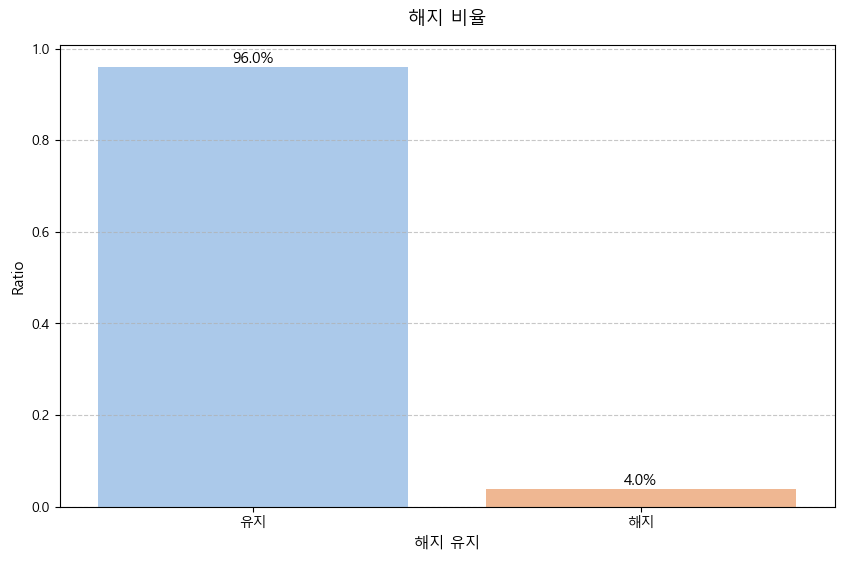

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=df['cancel_yn'].value_counts(normalize=True).index, 
                 y=df['cancel_yn'].value_counts(normalize=True).values,
                 palette='pastel')

plt.title('해지 비율', fontsize=13, pad=15)
plt.xlabel('해지 유지', fontsize=11)
plt.ylabel('Ratio', fontsize=11)

# 막대 위에 퍼센트 표시
for i, v in enumerate(df['cancel_yn'].value_counts(normalize=True)):
    ax.text(i, v, f'{v:.1%}', ha='center', va='bottom', fontsize=11)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [14]:
df.columns

Index(['sha2_hash', 'SVC_USE_DAYS_GRP', 'MEDIA_NM_GRP', 'PROD_NM_GRP',
       'PROD_OLD_YN', 'PROD_ONE_PLUS_YN', 'AGMT_KIND_NM', 'STB_RES_1M_YN',
       'SVOD_SCRB_CNT_GRP', 'PAID_CHNL_CNT_GRP', 'SCRB_PATH_NM_GRP',
       'INHOME_RATE', 'AGMT_END_SEG', 'AGMT_END_YMD', 'TOTAL_USED_DAYS',
       'TV_SCRB', 'ANALOG_SCRB', 'DIGITAL_SCRB', 'TOTAL_INTERNET_SCRB',
       'GIGA_INTERNET_SCRB', 'BUNDLE_YN', 'DIGITAL_GIGA_YN', 'DIGITAL_ALOG_YN',
       'TV_I_CNT', 'CH_LAST_DAYS_BF_GRP', 'VOC_TOTAL_MONTH1_YN',
       'VOC_STOP_CANCEL_MONTH1_YN', 'AGE_GRP10', 'EMAIL_RECV_CLS_NM',
       'SMS_SEND_CLS_NM', 'CH_HH_AVG_MONTH1', 'CH_25_RATIO_MONTH1',
       'CH_25_RATIO_MEAN_3MM', 'CH_FAV_RNK1', 'KIDS_USE_PV_MONTH1',
       'NFX_USE_YN', 'YTB_USE_YN', 'p_mt', 'cancel_yn'],
      dtype='object')

In [13]:
# cancel_yn 값을 '해지'로만 가지고 있는 사람들
# 4. cancel_yn 값이 모두 '해지'인 sha1 찾기
users_all_cancel = df.groupby('sha2_hash')['cancel_yn'].unique()
users_all_cancel = users_all_cancel[users_all_cancel.apply(lambda x: set(x) == {'해지'})].index.tolist()

In [14]:
df[df['sha2_hash'].isin(users_all_cancel)].sort_values(by=['sha2_hash','p_mt'], ascending=[True, True])

,sha2_hash,SVC_USE_DAYS_GRP,MEDIA_NM_GRP,PROD_NM_GRP,PROD_OLD_YN,PROD_ONE_PLUS_YN,AGMT_KIND_NM,STB_RES_1M_YN,SVOD_SCRB_CNT_GRP,PAID_CHNL_CNT_GRP,SCRB_PATH_NM_GRP,INHOME_RATE,AGMT_END_SEG,AGMT_END_YMD,TOTAL_USED_DAYS,TV_SCRB,ANALOG_SCRB,DIGITAL_SCRB,TOTAL_INTERNET_SCRB,GIGA_INTERNET_SCRB,BUNDLE_YN,DIGITAL_GIGA_YN,DIGITAL_ALOG_YN,TV_I_CNT,CH_LAST_DAYS_BF_GRP,VOC_TOTAL_MONTH1_YN,VOC_STOP_CANCEL_MONTH1_YN,AGE_GRP10,EMAIL_RECV_CLS_NM,SMS_SEND_CLS_NM,CH_HH_AVG_MONTH1,CH_25_RATIO_MONTH1,CH_25_RATIO_MEAN_3MM,CH_FAV_RNK1,KIDS_USE_PV_MONTH1,NFX_USE_YN,YTB_USE_YN,p_mt,cancel_yn
5925096,0001e7fbf7b042d5859da08a8168b8c355e0b572c16134263d82168f6598b5dc,36개월 이상,HD,프리미엄,N,N,재약정,Y,0건,0건,O/B,알수없음,약정만료후 12개월이상,20200723,3698,2.00,0.00,2.00,0.00,0.00,N,N,N,2.00,3개월내없음,N,N,60대,전체거부,전체거부,0.00,0.00,0.00,기타,0.00,N,N,202302,해지
261187,0001e7fbf7b042d5859da08a8168b8c355e0b572c16134263d82168f6598b5dc,36개월 이상,HD,프리미엄,N,N,재약정,Y,0건,0건,O/B,알수없음,약정만료후 12개월이상,20200723,3729,2.00,0.00,2.00,0.00,0.00,N,N,N,2.00,3개월내없음,N,N,60대,전체거부,전체거부,0.00,0.00,0.00,기타,0.00,N,N,202303,해지
5017095,0001e7fbf7b042d5859da08a8168b8c355e0b572c16134263d82168f6598b5dc,36개월 이상,HD,프리미엄,N,N,재약정,Y,0건,0건,O/B,알수없음,약정만료후 12개월이상,20200723,3759,2.00,0.00,2.00,0.00,0.00,N,N,N,2.00,3개월내없음,N,N,60대,전체거부,전체거부,0.00,0.00,0.00,기타,0.00,N,N,202304,해지
10425840,0001e7fbf7b042d5859da08a8168b8c355e0b572c16134263d82168f6598b5dc,36개월 이상,HD,프리미엄,N,N,재약정,Y,0건,0건,O/B,알수없음,약정만료후 12개월이상,20200723,3790,2.00,0.00,2.00,0.00,0.00,N,N,N,2.00,3개월내없음,N,N,60대,전체거부,전체거부,0.00,0.00,0.00,기타,0.00,N,N,202305,해지
6811437,0001e7fbf7b042d5859da08a8168b8c355e0b572c16134263d82168f6598b5dc,36개월 이상,HD,프리미엄,N,N,재약정,Y,0건,0건,O/B,알수없음,약정만료후 12개월이상,20200723,3820,2.00,0.00,2.00,0.00,0.00,N,N,N,2.00,3개월내없음,N,N,60대,전체거부,전체거부,0.00,0.00,0.00,기타,0.00,N,N,202306,해지
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20470835,fffe69a15fe995659e8be4de8c8b6dc72910ee05c7ab5e0a5bc7aeafb7ce8268,36개월 이상,HD,프리미엄,N,Y,재약정,N,0건,0건,O/B,30.0,약정만료후 12개월이상,20220103,2948,2.00,0.00,2.00,0.00,0.00,N,N,N,2.00,일주일내,N,N,80대,수신,수신,3.55,0.08,0.08,YTN,0.00,N,N,202311,해지
9330967,fffea35fc5d88b89a8031befccb61a4f34b03b6d8e5e1f2e8f18747a73eab8db,6개월미만,UHD,프리미엄,N,N,신규,Y,0건,0건,현장경로,0.0,약정만료전 12개월이상,20260519,11,1.00,0.00,1.00,1.00,1.00,Y,Y,N,2.00,일주일내,Y,N,50대,전체거부,전체거부,3.49,0.65,0.65,기타,0.00,Y,Y,202305,해지
6048828,ffff2f4cd93de1400bf12b1c97680dd6e87eeb64b7effd67a9a9afbf43c3c103,6개월~12개월미만,HD,베이직,N,N,신규,N,0건,0건,현장경로,10.0,약정만료전 12개월이상,20250811,200,1.00,0.00,1.00,0.00,0.00,N,N,N,1.00,일주일전,Y,N,50대,전체거부,전체거부,2.64,0.00,0.00,기타,0.00,N,N,202302,해지
1510608,ffff2f4cd93de1400bf12b1c97680dd6e87eeb64b7effd67a9a9afbf43c3c103,6개월~12개월미만,HD,베이직,N,N,신규,N,0건,0건,현장경로,0.0,약정만료전 12개월이상,20250811,231,1.00,0.00,1.00,0.00,0.00,N,N,N,1.00,일주일전,N,N,50대,전체거부,전체거부,0.62,0.00,0.00,기타,0.00,N,N,202303,해지


In [15]:
df[df['sha2_hash'] == '0001e7fbf7b042d5859da08a8168b8c355e0b572c16134263d82168f6598b5dc'][['sha2_hash','p_mt','cancel_yn']]

,sha2_hash,p_mt,cancel_yn
261187,0001e7fbf7b042d5859da08a8168b8c355e0b572c16134263d82168f6598b5dc,202303,해지
5017095,0001e7fbf7b042d5859da08a8168b8c355e0b572c16134263d82168f6598b5dc,202304,해지
5925096,0001e7fbf7b042d5859da08a8168b8c355e0b572c16134263d82168f6598b5dc,202302,해지
6811437,0001e7fbf7b042d5859da08a8168b8c355e0b572c16134263d82168f6598b5dc,202306,해지
9015917,0001e7fbf7b042d5859da08a8168b8c355e0b572c16134263d82168f6598b5dc,202307,해지
10425840,0001e7fbf7b042d5859da08a8168b8c355e0b572c16134263d82168f6598b5dc,202305,해지
14049148,0001e7fbf7b042d5859da08a8168b8c355e0b572c16134263d82168f6598b5dc,202308,해지
16904605,0001e7fbf7b042d5859da08a8168b8c355e0b572c16134263d82168f6598b5dc,202310,해지
17204380,0001e7fbf7b042d5859da08a8168b8c355e0b572c16134263d82168f6598b5dc,202309,해지
20932313,0001e7fbf7b042d5859da08a8168b8c355e0b572c16134263d82168f6598b5dc,202311,해지


In [16]:
# 해당 유저들만 필터링
# 5. 해당 유저들만 필터링
df_all_cancel = df[df['sha2_hash'].isin(users_all_cancel)]

In [17]:
# 6. sha1의 중복치가 1인 유저들은 제거
df_all_cancel = df_all_cancel[df_all_cancel.duplicated(subset=['sha2_hash'], keep=False)]
# 7. sha1 값만 추출
sha1_list = df_all_cancel['sha2_hash'].unique().tolist()

In [18]:
# 7. sha1 값만 추출
sha1_list = df_all_cancel['sha2_hash'].unique().tolist()

In [19]:
sha1_list

['14302f935b07be52c50a9f134577e5a38bbb992d0903ff05bd6f990b791fd3ea',
 '830844762390e881a42b969077adec5ec5da3aabca2cc0bc9c68938a5e3b202e',
 '7483f581b328bdac1ecefa471493e0b590da18e1ae14e92d3a9b49c47f5c1a78',
 'f0be71359f35022053a0d5a847cf7e0c350ad48f84b859e0adcf98e22c28dff6',
 '9183a8019bcbf1495ef53b8a56b7a3475bc7f7e6a45bf4757f66c75e0a0b1fbb',
 '8d97fb3f2016a885ca925453141a43887f1045397e8f51d946e99543ecf003be',
 '8dd1f2d98387a3462cdf409d4b91225436818a183acae32e011b2824d7fa5df6',
 'eee7d686a010fcabc7e4ebebbed62d2cb141abde2026bbd1e65951d76135eeb4',
 'de1dcc3222979afd2735b00e7b18e0c37504d4fb843cce63ad22b70ffe3defc6',
 '69fb8e2565de0fa7bc81f659b207f6d0e1161a949b15edba9d0346493e837a3b',
 '60151af65ff02d7b704199cb604901f3ed01bb10d0ad3a315836acf3381a4b2f',
 '3d9176712cf426e8615f36523d3b8db59cf494b03fb9a46cad7b36b4ea61ee4b',
 '509c06363cd2987392bf51b2ccd1d138b79e3d29322054e023f8c82a19508bdb',
 'a660873eb29b27c64c64af1b0ebfa173ee3b8c02e67de2e5e4358cf486f976c3',
 'a39661aea618f328723b7f192174577e

In [20]:
df[df['sha2_hash'] == '9c094b8a46df9baaf3c64cb8fe2433325638b7ed9cee323156c73d1aff9cc4ec']

,sha2_hash,SVC_USE_DAYS_GRP,MEDIA_NM_GRP,PROD_NM_GRP,PROD_OLD_YN,PROD_ONE_PLUS_YN,AGMT_KIND_NM,STB_RES_1M_YN,SVOD_SCRB_CNT_GRP,PAID_CHNL_CNT_GRP,SCRB_PATH_NM_GRP,INHOME_RATE,AGMT_END_SEG,AGMT_END_YMD,TOTAL_USED_DAYS,TV_SCRB,ANALOG_SCRB,DIGITAL_SCRB,TOTAL_INTERNET_SCRB,GIGA_INTERNET_SCRB,BUNDLE_YN,DIGITAL_GIGA_YN,DIGITAL_ALOG_YN,TV_I_CNT,CH_LAST_DAYS_BF_GRP,VOC_TOTAL_MONTH1_YN,VOC_STOP_CANCEL_MONTH1_YN,AGE_GRP10,EMAIL_RECV_CLS_NM,SMS_SEND_CLS_NM,CH_HH_AVG_MONTH1,CH_25_RATIO_MONTH1,CH_25_RATIO_MEAN_3MM,CH_FAV_RNK1,KIDS_USE_PV_MONTH1,NFX_USE_YN,YTB_USE_YN,p_mt,cancel_yn
416,9c094b8a46df9baaf3c64cb8fe2433325638b7ed9cee323156c73d1aff9cc4ec,36개월 이상,HD,이코노미,N,N,재약정,Y,1건,0건,현장경로,알수없음,약정만료후 12개월이상,20191030,3543,1.00,0.00,1.00,0.00,0.00,N,N,N,1.00,3개월내없음,N,N,50대,전체거부,전체거부,0.00,0.00,0.00,기타,0.00,N,N,202303,해지
4704291,9c094b8a46df9baaf3c64cb8fe2433325638b7ed9cee323156c73d1aff9cc4ec,36개월 이상,HD,이코노미,N,N,재약정,Y,1건,0건,현장경로,알수없음,약정만료후 12개월이상,20191030,3573,1.00,0.00,1.00,0.00,0.00,N,N,N,1.00,3개월내없음,N,N,50대,전체거부,전체거부,0.00,0.00,0.00,기타,0.00,N,N,202304,해지
5454158,9c094b8a46df9baaf3c64cb8fe2433325638b7ed9cee323156c73d1aff9cc4ec,36개월 이상,HD,이코노미,N,N,재약정,Y,1건,0건,현장경로,알수없음,약정만료후 12개월이상,20191030,3512,1.00,0.00,1.00,0.00,0.00,N,N,N,1.00,3개월내없음,N,N,50대,전체거부,전체거부,0.00,0.00,0.00,기타,0.00,N,N,202302,해지
6415064,9c094b8a46df9baaf3c64cb8fe2433325638b7ed9cee323156c73d1aff9cc4ec,36개월 이상,HD,이코노미,N,N,재약정,Y,1건,0건,현장경로,알수없음,약정만료후 12개월이상,20191030,3604,1.00,0.00,1.00,0.00,0.00,N,N,N,1.00,3개월내없음,N,N,50대,전체거부,전체거부,0.00,0.00,0.00,기타,0.00,N,N,202305,해지
7403457,9c094b8a46df9baaf3c64cb8fe2433325638b7ed9cee323156c73d1aff9cc4ec,36개월 이상,HD,이코노미,N,N,재약정,Y,1건,0건,현장경로,알수없음,약정만료후 12개월이상,20191030,3665,1.00,0.00,1.00,0.00,0.00,N,N,N,1.00,3개월내없음,N,N,50대,전체거부,전체거부,0.00,0.00,0.00,기타,0.00,N,N,202307,해지
11717688,9c094b8a46df9baaf3c64cb8fe2433325638b7ed9cee323156c73d1aff9cc4ec,36개월 이상,HD,이코노미,N,N,재약정,Y,1건,0건,현장경로,알수없음,약정만료후 12개월이상,20191030,3634,1.00,0.00,1.00,0.00,0.00,N,N,N,1.00,3개월내없음,N,N,50대,전체거부,전체거부,0.00,0.00,0.00,기타,0.00,N,N,202306,해지
12851529,9c094b8a46df9baaf3c64cb8fe2433325638b7ed9cee323156c73d1aff9cc4ec,36개월 이상,HD,이코노미,N,N,재약정,Y,1건,0건,현장경로,알수없음,약정만료후 12개월이상,20191030,3696,1.00,0.00,1.00,0.00,0.00,N,N,N,1.00,3개월내없음,N,N,60대,전체거부,전체거부,0.00,0.00,0.00,기타,0.00,N,N,202308,해지
14526939,9c094b8a46df9baaf3c64cb8fe2433325638b7ed9cee323156c73d1aff9cc4ec,36개월 이상,HD,이코노미,N,N,재약정,Y,1건,0건,현장경로,알수없음,약정만료후 12개월이상,20191030,3726,1.00,0.00,1.00,0.00,0.00,N,N,N,1.00,3개월내없음,N,N,60대,전체거부,전체거부,0.00,0.00,0.00,기타,0.00,N,N,202309,해지
17111755,9c094b8a46df9baaf3c64cb8fe2433325638b7ed9cee323156c73d1aff9cc4ec,36개월 이상,HD,이코노미,N,N,재약정,Y,1건,0건,현장경로,알수없음,약정만료후 12개월이상,20191030,3757,1.00,0.00,1.00,0.00,0.00,N,N,N,1.00,3개월내없음,N,N,60대,전체거부,전체거부,0.00,0.00,0.00,기타,0.00,N,N,202310,해지
19145848,9c094b8a46df9baaf3c64cb8fe2433325638b7ed9cee323156c73d1aff9cc4ec,36개월 이상,HD,이코노미,N,N,재약정,Y,1건,0건,현장경로,알수없음,약정만료후 12개월이상,20191030,3787,1.00,0.00,1.00,0.00,0.00,N,N,N,1.00,3개월내없음,N,N,60대,전체거부,전체거부,0.00,0.00,0.00,기타,0.00,N,N,202311,해지


In [21]:
df_1 = df

In [22]:
df_1.to_csv("data/preprocessing.csv", index=False)

In [3]:
df_1 = pd.read_csv("data/preprocessing.csv")

In [4]:
# cancel_yn 값을 '해지'로만 가지고 있는 사람들
# 4. cancel_yn 값이 모두 '해지'인 sha1 찾기
users_all_cancel = df_1.groupby('sha2_hash')['cancel_yn'].unique()
users_all_cancel = users_all_cancel[users_all_cancel.apply(lambda x: set(x) == {'해지'})].index.tolist()

In [5]:
df_1[df_1['sha2_hash'].isin(users_all_cancel)].sort_values(by=['sha2_hash','p_mt'], ascending=[True, True])

,sha2_hash,SVC_USE_DAYS_GRP,MEDIA_NM_GRP,PROD_NM_GRP,PROD_OLD_YN,PROD_ONE_PLUS_YN,AGMT_KIND_NM,STB_RES_1M_YN,SVOD_SCRB_CNT_GRP,PAID_CHNL_CNT_GRP,SCRB_PATH_NM_GRP,INHOME_RATE,AGMT_END_SEG,AGMT_END_YMD,TOTAL_USED_DAYS,TV_SCRB,ANALOG_SCRB,DIGITAL_SCRB,TOTAL_INTERNET_SCRB,GIGA_INTERNET_SCRB,BUNDLE_YN,DIGITAL_GIGA_YN,DIGITAL_ALOG_YN,TV_I_CNT,CH_LAST_DAYS_BF_GRP,VOC_TOTAL_MONTH1_YN,VOC_STOP_CANCEL_MONTH1_YN,AGE_GRP10,EMAIL_RECV_CLS_NM,SMS_SEND_CLS_NM,CH_HH_AVG_MONTH1,CH_25_RATIO_MONTH1,CH_25_RATIO_MEAN_3MM,CH_FAV_RNK1,KIDS_USE_PV_MONTH1,NFX_USE_YN,YTB_USE_YN,p_mt,cancel_yn
5818023,0001e7fbf7b042d5859da08a8168b8c355e0b572c16134263d82168f6598b5dc,36개월 이상,HD,프리미엄,N,N,재약정,Y,0건,0건,O/B,알수없음,약정만료후 12개월이상,20200723,3698,2.00,0.00,2.00,0.00,0.00,N,N,N,2.00,3개월내없음,N,N,60대,전체거부,전체거부,0.00,0.00,0.00,기타,0.00,N,N,202302,해지
256334,0001e7fbf7b042d5859da08a8168b8c355e0b572c16134263d82168f6598b5dc,36개월 이상,HD,프리미엄,N,N,재약정,Y,0건,0건,O/B,알수없음,약정만료후 12개월이상,20200723,3729,2.00,0.00,2.00,0.00,0.00,N,N,N,2.00,3개월내없음,N,N,60대,전체거부,전체거부,0.00,0.00,0.00,기타,0.00,N,N,202303,해지
4926276,0001e7fbf7b042d5859da08a8168b8c355e0b572c16134263d82168f6598b5dc,36개월 이상,HD,프리미엄,N,N,재약정,Y,0건,0건,O/B,알수없음,약정만료후 12개월이상,20200723,3759,2.00,0.00,2.00,0.00,0.00,N,N,N,2.00,3개월내없음,N,N,60대,전체거부,전체거부,0.00,0.00,0.00,기타,0.00,N,N,202304,해지
10236254,0001e7fbf7b042d5859da08a8168b8c355e0b572c16134263d82168f6598b5dc,36개월 이상,HD,프리미엄,N,N,재약정,Y,0건,0건,O/B,알수없음,약정만료후 12개월이상,20200723,3790,2.00,0.00,2.00,0.00,0.00,N,N,N,2.00,3개월내없음,N,N,60대,전체거부,전체거부,0.00,0.00,0.00,기타,0.00,N,N,202305,해지
6688144,0001e7fbf7b042d5859da08a8168b8c355e0b572c16134263d82168f6598b5dc,36개월 이상,HD,프리미엄,N,N,재약정,Y,0건,0건,O/B,알수없음,약정만료후 12개월이상,20200723,3820,2.00,0.00,2.00,0.00,0.00,N,N,N,2.00,3개월내없음,N,N,60대,전체거부,전체거부,0.00,0.00,0.00,기타,0.00,N,N,202306,해지
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20095957,fffe69a15fe995659e8be4de8c8b6dc72910ee05c7ab5e0a5bc7aeafb7ce8268,36개월 이상,HD,프리미엄,N,Y,재약정,N,0건,0건,O/B,30.0,약정만료후 12개월이상,20220103,2948,2.00,0.00,2.00,0.00,0.00,N,N,N,2.00,일주일내,N,N,80대,수신,수신,3.55,0.08,0.08,YTN,0.00,N,N,202311,해지
9161384,fffea35fc5d88b89a8031befccb61a4f34b03b6d8e5e1f2e8f18747a73eab8db,6개월미만,UHD,프리미엄,N,N,신규,Y,0건,0건,현장경로,0.0,약정만료전 12개월이상,20260519,11,1.00,0.00,1.00,1.00,1.00,Y,Y,N,2.00,일주일내,Y,N,50대,전체거부,전체거부,3.49,0.65,0.65,기타,0.00,Y,Y,202305,해지
5939563,ffff2f4cd93de1400bf12b1c97680dd6e87eeb64b7effd67a9a9afbf43c3c103,6개월~12개월미만,HD,베이직,N,N,신규,N,0건,0건,현장경로,10.0,약정만료전 12개월이상,20250811,200,1.00,0.00,1.00,0.00,0.00,N,N,N,1.00,일주일전,Y,N,50대,전체거부,전체거부,2.64,0.00,0.00,기타,0.00,N,N,202302,해지
1483094,ffff2f4cd93de1400bf12b1c97680dd6e87eeb64b7effd67a9a9afbf43c3c103,6개월~12개월미만,HD,베이직,N,N,신규,N,0건,0건,현장경로,0.0,약정만료전 12개월이상,20250811,231,1.00,0.00,1.00,0.00,0.00,N,N,N,1.00,일주일전,N,N,50대,전체거부,전체거부,0.62,0.00,0.00,기타,0.00,N,N,202303,해지


In [6]:
df_1[df_1['sha2_hash'] == '0001e7fbf7b042d5859da08a8168b8c355e0b572c16134263d82168f6598b5dc'][['sha2_hash','p_mt','cancel_yn']]

,sha2_hash,p_mt,cancel_yn
256334,0001e7fbf7b042d5859da08a8168b8c355e0b572c16134263d82168f6598b5dc,202303,해지
4926276,0001e7fbf7b042d5859da08a8168b8c355e0b572c16134263d82168f6598b5dc,202304,해지
5818023,0001e7fbf7b042d5859da08a8168b8c355e0b572c16134263d82168f6598b5dc,202302,해지
6688144,0001e7fbf7b042d5859da08a8168b8c355e0b572c16134263d82168f6598b5dc,202306,해지
8852014,0001e7fbf7b042d5859da08a8168b8c355e0b572c16134263d82168f6598b5dc,202307,해지
10236254,0001e7fbf7b042d5859da08a8168b8c355e0b572c16134263d82168f6598b5dc,202305,해지
13793111,0001e7fbf7b042d5859da08a8168b8c355e0b572c16134263d82168f6598b5dc,202308,해지
16595861,0001e7fbf7b042d5859da08a8168b8c355e0b572c16134263d82168f6598b5dc,202310,해지
16890039,0001e7fbf7b042d5859da08a8168b8c355e0b572c16134263d82168f6598b5dc,202309,해지
20548895,0001e7fbf7b042d5859da08a8168b8c355e0b572c16134263d82168f6598b5dc,202311,해지


In [7]:
df_all_cancel = df_1[df_1['sha2_hash'].isin(users_all_cancel)]

In [8]:
# 6. sha1의 중복치가 1인 유저들은 제거
df_all_cancel = df_all_cancel[df_all_cancel.duplicated(subset=['sha2_hash'], keep=False)]

In [9]:
# 7. sha1 값만 추출
sha1_list = df_all_cancel['sha2_hash'].unique().tolist()

In [10]:
sha1_list

['14302f935b07be52c50a9f134577e5a38bbb992d0903ff05bd6f990b791fd3ea',
 '830844762390e881a42b969077adec5ec5da3aabca2cc0bc9c68938a5e3b202e',
 '7483f581b328bdac1ecefa471493e0b590da18e1ae14e92d3a9b49c47f5c1a78',
 'f0be71359f35022053a0d5a847cf7e0c350ad48f84b859e0adcf98e22c28dff6',
 '9183a8019bcbf1495ef53b8a56b7a3475bc7f7e6a45bf4757f66c75e0a0b1fbb',
 '8d97fb3f2016a885ca925453141a43887f1045397e8f51d946e99543ecf003be',
 '8dd1f2d98387a3462cdf409d4b91225436818a183acae32e011b2824d7fa5df6',
 'eee7d686a010fcabc7e4ebebbed62d2cb141abde2026bbd1e65951d76135eeb4',
 'de1dcc3222979afd2735b00e7b18e0c37504d4fb843cce63ad22b70ffe3defc6',
 '69fb8e2565de0fa7bc81f659b207f6d0e1161a949b15edba9d0346493e837a3b',
 '60151af65ff02d7b704199cb604901f3ed01bb10d0ad3a315836acf3381a4b2f',
 '3d9176712cf426e8615f36523d3b8db59cf494b03fb9a46cad7b36b4ea61ee4b',
 '509c06363cd2987392bf51b2ccd1d138b79e3d29322054e023f8c82a19508bdb',
 'a660873eb29b27c64c64af1b0ebfa173ee3b8c02e67de2e5e4358cf486f976c3',
 'a39661aea618f328723b7f192174577e

In [11]:
df_1[df_1['sha2_hash'] == '9653b58b0b61ebf68fc19fb213060a4f7492ef22ac9b2d8971505f9dc7f32b18'][['sha2_hash','p_mt','cancel_yn']]

,sha2_hash,p_mt,cancel_yn
456,9653b58b0b61ebf68fc19fb213060a4f7492ef22ac9b2d8971505f9dc7f32b18,202303,해지
4619103,9653b58b0b61ebf68fc19fb213060a4f7492ef22ac9b2d8971505f9dc7f32b18,202304,해지
5355728,9653b58b0b61ebf68fc19fb213060a4f7492ef22ac9b2d8971505f9dc7f32b18,202302,해지
6299039,9653b58b0b61ebf68fc19fb213060a4f7492ef22ac9b2d8971505f9dc7f32b18,202305,해지
7269508,9653b58b0b61ebf68fc19fb213060a4f7492ef22ac9b2d8971505f9dc7f32b18,202307,해지
11504690,9653b58b0b61ebf68fc19fb213060a4f7492ef22ac9b2d8971505f9dc7f32b18,202306,해지
12617871,9653b58b0b61ebf68fc19fb213060a4f7492ef22ac9b2d8971505f9dc7f32b18,202308,해지
14262024,9653b58b0b61ebf68fc19fb213060a4f7492ef22ac9b2d8971505f9dc7f32b18,202309,해지


In [12]:
df_2 = df_1[df_1['sha2_hash'].isin(sha1_list)]

In [13]:
df_2

,sha2_hash,SVC_USE_DAYS_GRP,MEDIA_NM_GRP,PROD_NM_GRP,PROD_OLD_YN,PROD_ONE_PLUS_YN,AGMT_KIND_NM,STB_RES_1M_YN,SVOD_SCRB_CNT_GRP,PAID_CHNL_CNT_GRP,SCRB_PATH_NM_GRP,INHOME_RATE,AGMT_END_SEG,AGMT_END_YMD,TOTAL_USED_DAYS,TV_SCRB,ANALOG_SCRB,DIGITAL_SCRB,TOTAL_INTERNET_SCRB,GIGA_INTERNET_SCRB,BUNDLE_YN,DIGITAL_GIGA_YN,DIGITAL_ALOG_YN,TV_I_CNT,CH_LAST_DAYS_BF_GRP,VOC_TOTAL_MONTH1_YN,VOC_STOP_CANCEL_MONTH1_YN,AGE_GRP10,EMAIL_RECV_CLS_NM,SMS_SEND_CLS_NM,CH_HH_AVG_MONTH1,CH_25_RATIO_MONTH1,CH_25_RATIO_MEAN_3MM,CH_FAV_RNK1,KIDS_USE_PV_MONTH1,NFX_USE_YN,YTB_USE_YN,p_mt,cancel_yn
16,14302f935b07be52c50a9f134577e5a38bbb992d0903ff05bd6f990b791fd3ea,6개월미만,UHD,베이직,N,N,신규,N,0건,0건,현장경로,0.0,약정만료전 12개월이상,20260223,2555,3.00,0.00,3.00,1.00,1.00,Y,Y,N,4.00,일주일내,Y,N,50대,수신,수신,1.85,0.10,0.10,연합뉴스TV,1.00,Y,Y,202303,해지
56,830844762390e881a42b969077adec5ec5da3aabca2cc0bc9c68938a5e3b202e,6개월미만,UHD,이코노미,N,N,신규,Y,0건,0건,직영몰,0.0,약정만료전 12개월이상,20260315,15,1.00,0.00,1.00,0.00,0.00,N,N,N,1.00,일주일내,Y,N,40대,수신,수신,0.99,0.43,0.43,기타,0.00,N,N,202303,해지
68,7483f581b328bdac1ecefa471493e0b590da18e1ae14e92d3a9b49c47f5c1a78,6개월미만,UHD,프리미엄,N,N,신규,Y,0건,0건,현장경로,0.0,약정만료전 12개월이상,20260320,10,1.00,0.00,1.00,1.00,0.00,Y,N,N,2.00,일주일내,Y,N,50대,전체거부,전체거부,4.29,8.64,8.64,기타,0.00,Y,Y,202303,해지
92,f0be71359f35022053a0d5a847cf7e0c350ad48f84b859e0adcf98e22c28dff6,36개월 이상,HD,베이직,N,N,재약정,N,0건,0건,현장경로,0.0,약정만료후 12개월이상,20210115,2998,1.00,0.00,1.00,1.00,0.00,Y,N,N,2.00,일주일내,N,N,30대,수신,전체거부,1.68,0.00,0.00,기타,0.00,N,N,202303,해지
103,9183a8019bcbf1495ef53b8a56b7a3475bc7f7e6a45bf4757f66c75e0a0b1fbb,36개월 이상,HD,베이직,N,N,신규,Y,0건,0건,O/B,알수없음,약정만료후 12개월이상,20151228,3744,1.00,0.00,1.00,0.00,0.00,N,N,N,1.00,3개월내없음,N,N,연령없음,전체거부,수신,0.00,0.00,0.00,기타,0.00,N,N,202303,해지
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22472796,ddadffc3edd7e13bf1dfa092f5f66cd412fd4f6f4419149ae7c74dac87803ecf,6개월~12개월미만,UHD,베이직,N,N,약정승계,N,0건,1건,현장경로,50.0,약정만료전 12개월이상,20250525,3332,1.00,0.00,1.00,1.00,0.00,Y,N,N,2.00,일주일내,N,N,60대,수신,수신,8.36,0.02,0.02,기타,0.00,N,N,202311,해지
22472876,5161e78641aa3bbbafa1dddad2c08c0a4d03f88d9058c28943c042a171fb52b3,36개월 이상,HD,프리미엄,N,N,신규,N,0건,0건,O/B,10.0,약정만료후 12개월이상,20170328,3898,2.00,0.00,2.00,1.00,0.00,Y,N,N,3.00,일주일내,Y,Y,90대이상,수신,수신,2.49,0.00,0.00,KBS1,0.00,N,N,202311,해지
22472983,3791767217db78d03ea3ad0ec7081bc602f204a295f266051f908d92d36368dd,36개월 이상,HD,베이직,N,N,신규,N,0건,0건,현장경로,20.0,약정만료후 12개월이상,20171017,3330,1.00,0.00,1.00,0.00,0.00,N,N,N,1.00,일주일내,Y,Y,50대,전체거부,수신,3.81,3.30,3.30,기타,0.00,N,N,202311,해지
22473233,840ee3de65aa0fa7da1fcf0962faca218077a956d512f9c734b3a3685eb4ef84,36개월 이상,HD,이코노미,N,N,약정승계,Y,0건,0건,현장경로,알수없음,약정만료후 12개월이상,20170917,3270,1.00,0.00,1.00,0.00,0.00,N,N,N,1.00,3개월내없음,Y,N,30대,수신,수신,0.00,0.00,0.00,기타,0.00,N,N,202311,해지


In [14]:
df_2['cancel_yn'] = '유지'

In [15]:
max_p_mt_per_user = df_2.groupby('sha2_hash')['p_mt'].max().to_dict()

In [16]:
df_2.loc[df_2['p_mt'] == df_2['sha2_hash'].map(max_p_mt_per_user), 'cancel_yn'] = '해지'

In [17]:
df_2

,sha2_hash,SVC_USE_DAYS_GRP,MEDIA_NM_GRP,PROD_NM_GRP,PROD_OLD_YN,PROD_ONE_PLUS_YN,AGMT_KIND_NM,STB_RES_1M_YN,SVOD_SCRB_CNT_GRP,PAID_CHNL_CNT_GRP,SCRB_PATH_NM_GRP,INHOME_RATE,AGMT_END_SEG,AGMT_END_YMD,TOTAL_USED_DAYS,TV_SCRB,ANALOG_SCRB,DIGITAL_SCRB,TOTAL_INTERNET_SCRB,GIGA_INTERNET_SCRB,BUNDLE_YN,DIGITAL_GIGA_YN,DIGITAL_ALOG_YN,TV_I_CNT,CH_LAST_DAYS_BF_GRP,VOC_TOTAL_MONTH1_YN,VOC_STOP_CANCEL_MONTH1_YN,AGE_GRP10,EMAIL_RECV_CLS_NM,SMS_SEND_CLS_NM,CH_HH_AVG_MONTH1,CH_25_RATIO_MONTH1,CH_25_RATIO_MEAN_3MM,CH_FAV_RNK1,KIDS_USE_PV_MONTH1,NFX_USE_YN,YTB_USE_YN,p_mt,cancel_yn
16,14302f935b07be52c50a9f134577e5a38bbb992d0903ff05bd6f990b791fd3ea,6개월미만,UHD,베이직,N,N,신규,N,0건,0건,현장경로,0.0,약정만료전 12개월이상,20260223,2555,3.00,0.00,3.00,1.00,1.00,Y,Y,N,4.00,일주일내,Y,N,50대,수신,수신,1.85,0.10,0.10,연합뉴스TV,1.00,Y,Y,202303,유지
56,830844762390e881a42b969077adec5ec5da3aabca2cc0bc9c68938a5e3b202e,6개월미만,UHD,이코노미,N,N,신규,Y,0건,0건,직영몰,0.0,약정만료전 12개월이상,20260315,15,1.00,0.00,1.00,0.00,0.00,N,N,N,1.00,일주일내,Y,N,40대,수신,수신,0.99,0.43,0.43,기타,0.00,N,N,202303,유지
68,7483f581b328bdac1ecefa471493e0b590da18e1ae14e92d3a9b49c47f5c1a78,6개월미만,UHD,프리미엄,N,N,신규,Y,0건,0건,현장경로,0.0,약정만료전 12개월이상,20260320,10,1.00,0.00,1.00,1.00,0.00,Y,N,N,2.00,일주일내,Y,N,50대,전체거부,전체거부,4.29,8.64,8.64,기타,0.00,Y,Y,202303,유지
92,f0be71359f35022053a0d5a847cf7e0c350ad48f84b859e0adcf98e22c28dff6,36개월 이상,HD,베이직,N,N,재약정,N,0건,0건,현장경로,0.0,약정만료후 12개월이상,20210115,2998,1.00,0.00,1.00,1.00,0.00,Y,N,N,2.00,일주일내,N,N,30대,수신,전체거부,1.68,0.00,0.00,기타,0.00,N,N,202303,유지
103,9183a8019bcbf1495ef53b8a56b7a3475bc7f7e6a45bf4757f66c75e0a0b1fbb,36개월 이상,HD,베이직,N,N,신규,Y,0건,0건,O/B,알수없음,약정만료후 12개월이상,20151228,3744,1.00,0.00,1.00,0.00,0.00,N,N,N,1.00,3개월내없음,N,N,연령없음,전체거부,수신,0.00,0.00,0.00,기타,0.00,N,N,202303,유지
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22472796,ddadffc3edd7e13bf1dfa092f5f66cd412fd4f6f4419149ae7c74dac87803ecf,6개월~12개월미만,UHD,베이직,N,N,약정승계,N,0건,1건,현장경로,50.0,약정만료전 12개월이상,20250525,3332,1.00,0.00,1.00,1.00,0.00,Y,N,N,2.00,일주일내,N,N,60대,수신,수신,8.36,0.02,0.02,기타,0.00,N,N,202311,유지
22472876,5161e78641aa3bbbafa1dddad2c08c0a4d03f88d9058c28943c042a171fb52b3,36개월 이상,HD,프리미엄,N,N,신규,N,0건,0건,O/B,10.0,약정만료후 12개월이상,20170328,3898,2.00,0.00,2.00,1.00,0.00,Y,N,N,3.00,일주일내,Y,Y,90대이상,수신,수신,2.49,0.00,0.00,KBS1,0.00,N,N,202311,유지
22472983,3791767217db78d03ea3ad0ec7081bc602f204a295f266051f908d92d36368dd,36개월 이상,HD,베이직,N,N,신규,N,0건,0건,현장경로,20.0,약정만료후 12개월이상,20171017,3330,1.00,0.00,1.00,0.00,0.00,N,N,N,1.00,일주일내,Y,Y,50대,전체거부,수신,3.81,3.30,3.30,기타,0.00,N,N,202311,해지
22473233,840ee3de65aa0fa7da1fcf0962faca218077a956d512f9c734b3a3685eb4ef84,36개월 이상,HD,이코노미,N,N,약정승계,Y,0건,0건,현장경로,알수없음,약정만료후 12개월이상,20170917,3270,1.00,0.00,1.00,0.00,0.00,N,N,N,1.00,3개월내없음,Y,N,30대,수신,수신,0.00,0.00,0.00,기타,0.00,N,N,202311,해지


In [18]:
df_1[df_1['sha2_hash'] == '5161e78641aa3bbbafa1dddad2c08c0a4d03f88d9058c28943c042a171fb52b3']

,sha2_hash,SVC_USE_DAYS_GRP,MEDIA_NM_GRP,PROD_NM_GRP,PROD_OLD_YN,PROD_ONE_PLUS_YN,AGMT_KIND_NM,STB_RES_1M_YN,SVOD_SCRB_CNT_GRP,PAID_CHNL_CNT_GRP,SCRB_PATH_NM_GRP,INHOME_RATE,AGMT_END_SEG,AGMT_END_YMD,TOTAL_USED_DAYS,TV_SCRB,ANALOG_SCRB,DIGITAL_SCRB,TOTAL_INTERNET_SCRB,GIGA_INTERNET_SCRB,BUNDLE_YN,DIGITAL_GIGA_YN,DIGITAL_ALOG_YN,TV_I_CNT,CH_LAST_DAYS_BF_GRP,VOC_TOTAL_MONTH1_YN,VOC_STOP_CANCEL_MONTH1_YN,AGE_GRP10,EMAIL_RECV_CLS_NM,SMS_SEND_CLS_NM,CH_HH_AVG_MONTH1,CH_25_RATIO_MONTH1,CH_25_RATIO_MEAN_3MM,CH_FAV_RNK1,KIDS_USE_PV_MONTH1,NFX_USE_YN,YTB_USE_YN,p_mt,cancel_yn
504005,5161e78641aa3bbbafa1dddad2c08c0a4d03f88d9058c28943c042a171fb52b3,36개월 이상,HD,프리미엄,N,N,신규,N,0건,0건,O/B,30.0,약정만료후 12개월이상,20170328,3684,2.00,0.00,2.00,1.00,0.00,Y,N,N,3.00,일주일내,N,N,90대이상,수신,수신,4.45,1.06,1.06,KBS1,0.00,N,N,202304,해지
1997119,5161e78641aa3bbbafa1dddad2c08c0a4d03f88d9058c28943c042a171fb52b3,36개월 이상,HD,프리미엄,N,N,신규,N,0건,0건,O/B,30.0,약정만료후 12개월이상,20170328,3654,2.00,0.00,2.00,1.00,0.00,Y,N,N,3.00,일주일내,N,N,90대이상,수신,수신,4.93,2.01,2.01,기타,0.00,N,N,202303,해지
4549273,5161e78641aa3bbbafa1dddad2c08c0a4d03f88d9058c28943c042a171fb52b3,36개월 이상,HD,프리미엄,N,N,신규,N,0건,0건,O/B,30.0,약정만료후 12개월이상,20170328,3623,2.00,0.00,2.00,1.00,0.00,Y,N,N,3.00,일주일내,N,N,90대이상,수신,수신,6.12,3.52,3.52,기타,1.00,N,N,202302,해지
7412614,5161e78641aa3bbbafa1dddad2c08c0a4d03f88d9058c28943c042a171fb52b3,36개월 이상,HD,프리미엄,N,N,신규,N,0건,0건,O/B,10.0,약정만료후 12개월이상,20170328,3776,2.00,0.00,2.00,1.00,0.00,Y,N,N,3.00,일주일내,N,N,90대이상,수신,수신,3.66,4.09,4.09,KBS1,0.00,N,N,202307,해지
9653362,5161e78641aa3bbbafa1dddad2c08c0a4d03f88d9058c28943c042a171fb52b3,36개월 이상,HD,프리미엄,N,N,신규,N,0건,0건,O/B,20.0,약정만료후 12개월이상,20170328,3715,2.00,0.00,2.00,1.00,0.00,Y,N,N,3.00,일주일내,N,N,90대이상,수신,수신,4.04,3.19,3.19,기타,0.00,N,N,202305,해지
11495271,5161e78641aa3bbbafa1dddad2c08c0a4d03f88d9058c28943c042a171fb52b3,36개월 이상,HD,프리미엄,N,N,신규,N,0건,0건,O/B,20.0,약정만료후 12개월이상,20170328,3745,2.00,0.00,2.00,1.00,0.00,Y,N,N,3.00,일주일내,N,N,90대이상,수신,수신,2.67,3.19,3.19,KBS1,0.00,N,N,202306,해지
14623131,5161e78641aa3bbbafa1dddad2c08c0a4d03f88d9058c28943c042a171fb52b3,36개월 이상,HD,프리미엄,N,N,신규,N,0건,0건,O/B,10.0,약정만료후 12개월이상,20170328,3868,2.00,0.00,2.00,1.00,0.00,Y,N,N,3.00,일주일내,N,N,90대이상,수신,수신,2.18,10.15,10.15,기타,1.00,N,N,202310,해지
15469451,5161e78641aa3bbbafa1dddad2c08c0a4d03f88d9058c28943c042a171fb52b3,36개월 이상,HD,프리미엄,N,N,신규,N,0건,0건,O/B,10.0,약정만료후 12개월이상,20170328,3807,2.00,0.00,2.00,1.00,0.00,Y,N,N,3.00,일주일내,N,N,90대이상,수신,수신,2.96,3.97,3.97,기타,0.00,N,N,202308,해지
18077061,5161e78641aa3bbbafa1dddad2c08c0a4d03f88d9058c28943c042a171fb52b3,36개월 이상,HD,프리미엄,N,N,신규,N,0건,0건,O/B,10.0,약정만료후 12개월이상,20170328,3837,2.00,0.00,2.00,1.00,0.00,Y,N,N,3.00,일주일내,N,N,90대이상,수신,수신,3.30,0.00,0.00,기타,0.00,N,N,202309,해지
20839583,5161e78641aa3bbbafa1dddad2c08c0a4d03f88d9058c28943c042a171fb52b3,36개월 이상,HD,프리미엄,N,N,신규,N,0건,0건,O/B,10.0,약정만료후 12개월이상,20170328,3929,2.00,0.00,2.00,1.00,0.00,Y,N,N,3.00,일주일내,N,N,90대이상,수신,수신,3.12,0.49,0.49,기타,0.00,N,N,202312,해지


In [19]:
df_2

,sha2_hash,SVC_USE_DAYS_GRP,MEDIA_NM_GRP,PROD_NM_GRP,PROD_OLD_YN,PROD_ONE_PLUS_YN,AGMT_KIND_NM,STB_RES_1M_YN,SVOD_SCRB_CNT_GRP,PAID_CHNL_CNT_GRP,SCRB_PATH_NM_GRP,INHOME_RATE,AGMT_END_SEG,AGMT_END_YMD,TOTAL_USED_DAYS,TV_SCRB,ANALOG_SCRB,DIGITAL_SCRB,TOTAL_INTERNET_SCRB,GIGA_INTERNET_SCRB,BUNDLE_YN,DIGITAL_GIGA_YN,DIGITAL_ALOG_YN,TV_I_CNT,CH_LAST_DAYS_BF_GRP,VOC_TOTAL_MONTH1_YN,VOC_STOP_CANCEL_MONTH1_YN,AGE_GRP10,EMAIL_RECV_CLS_NM,SMS_SEND_CLS_NM,CH_HH_AVG_MONTH1,CH_25_RATIO_MONTH1,CH_25_RATIO_MEAN_3MM,CH_FAV_RNK1,KIDS_USE_PV_MONTH1,NFX_USE_YN,YTB_USE_YN,p_mt,cancel_yn
16,14302f935b07be52c50a9f134577e5a38bbb992d0903ff05bd6f990b791fd3ea,6개월미만,UHD,베이직,N,N,신규,N,0건,0건,현장경로,0.0,약정만료전 12개월이상,20260223,2555,3.00,0.00,3.00,1.00,1.00,Y,Y,N,4.00,일주일내,Y,N,50대,수신,수신,1.85,0.10,0.10,연합뉴스TV,1.00,Y,Y,202303,유지
56,830844762390e881a42b969077adec5ec5da3aabca2cc0bc9c68938a5e3b202e,6개월미만,UHD,이코노미,N,N,신규,Y,0건,0건,직영몰,0.0,약정만료전 12개월이상,20260315,15,1.00,0.00,1.00,0.00,0.00,N,N,N,1.00,일주일내,Y,N,40대,수신,수신,0.99,0.43,0.43,기타,0.00,N,N,202303,유지
68,7483f581b328bdac1ecefa471493e0b590da18e1ae14e92d3a9b49c47f5c1a78,6개월미만,UHD,프리미엄,N,N,신규,Y,0건,0건,현장경로,0.0,약정만료전 12개월이상,20260320,10,1.00,0.00,1.00,1.00,0.00,Y,N,N,2.00,일주일내,Y,N,50대,전체거부,전체거부,4.29,8.64,8.64,기타,0.00,Y,Y,202303,유지
92,f0be71359f35022053a0d5a847cf7e0c350ad48f84b859e0adcf98e22c28dff6,36개월 이상,HD,베이직,N,N,재약정,N,0건,0건,현장경로,0.0,약정만료후 12개월이상,20210115,2998,1.00,0.00,1.00,1.00,0.00,Y,N,N,2.00,일주일내,N,N,30대,수신,전체거부,1.68,0.00,0.00,기타,0.00,N,N,202303,유지
103,9183a8019bcbf1495ef53b8a56b7a3475bc7f7e6a45bf4757f66c75e0a0b1fbb,36개월 이상,HD,베이직,N,N,신규,Y,0건,0건,O/B,알수없음,약정만료후 12개월이상,20151228,3744,1.00,0.00,1.00,0.00,0.00,N,N,N,1.00,3개월내없음,N,N,연령없음,전체거부,수신,0.00,0.00,0.00,기타,0.00,N,N,202303,유지
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22472796,ddadffc3edd7e13bf1dfa092f5f66cd412fd4f6f4419149ae7c74dac87803ecf,6개월~12개월미만,UHD,베이직,N,N,약정승계,N,0건,1건,현장경로,50.0,약정만료전 12개월이상,20250525,3332,1.00,0.00,1.00,1.00,0.00,Y,N,N,2.00,일주일내,N,N,60대,수신,수신,8.36,0.02,0.02,기타,0.00,N,N,202311,유지
22472876,5161e78641aa3bbbafa1dddad2c08c0a4d03f88d9058c28943c042a171fb52b3,36개월 이상,HD,프리미엄,N,N,신규,N,0건,0건,O/B,10.0,약정만료후 12개월이상,20170328,3898,2.00,0.00,2.00,1.00,0.00,Y,N,N,3.00,일주일내,Y,Y,90대이상,수신,수신,2.49,0.00,0.00,KBS1,0.00,N,N,202311,유지
22472983,3791767217db78d03ea3ad0ec7081bc602f204a295f266051f908d92d36368dd,36개월 이상,HD,베이직,N,N,신규,N,0건,0건,현장경로,20.0,약정만료후 12개월이상,20171017,3330,1.00,0.00,1.00,0.00,0.00,N,N,N,1.00,일주일내,Y,Y,50대,전체거부,수신,3.81,3.30,3.30,기타,0.00,N,N,202311,해지
22473233,840ee3de65aa0fa7da1fcf0962faca218077a956d512f9c734b3a3685eb4ef84,36개월 이상,HD,이코노미,N,N,약정승계,Y,0건,0건,현장경로,알수없음,약정만료후 12개월이상,20170917,3270,1.00,0.00,1.00,0.00,0.00,N,N,N,1.00,3개월내없음,Y,N,30대,수신,수신,0.00,0.00,0.00,기타,0.00,N,N,202311,해지


In [20]:
# 1. df_2에서 sha2_hash 값 추출
sha2_hash_list = df_2['sha2_hash'].unique().tolist()


In [21]:
df_1 = df_1[~df_1['sha2_hash'].isin(sha2_hash_list)]

In [22]:
df_1

,sha2_hash,SVC_USE_DAYS_GRP,MEDIA_NM_GRP,PROD_NM_GRP,PROD_OLD_YN,PROD_ONE_PLUS_YN,AGMT_KIND_NM,STB_RES_1M_YN,SVOD_SCRB_CNT_GRP,PAID_CHNL_CNT_GRP,SCRB_PATH_NM_GRP,INHOME_RATE,AGMT_END_SEG,AGMT_END_YMD,TOTAL_USED_DAYS,TV_SCRB,ANALOG_SCRB,DIGITAL_SCRB,TOTAL_INTERNET_SCRB,GIGA_INTERNET_SCRB,BUNDLE_YN,DIGITAL_GIGA_YN,DIGITAL_ALOG_YN,TV_I_CNT,CH_LAST_DAYS_BF_GRP,VOC_TOTAL_MONTH1_YN,VOC_STOP_CANCEL_MONTH1_YN,AGE_GRP10,EMAIL_RECV_CLS_NM,SMS_SEND_CLS_NM,CH_HH_AVG_MONTH1,CH_25_RATIO_MONTH1,CH_25_RATIO_MEAN_3MM,CH_FAV_RNK1,KIDS_USE_PV_MONTH1,NFX_USE_YN,YTB_USE_YN,p_mt,cancel_yn
0,6c2fb1fb0b1e316975157671e03d0e2eb3d250a73733215446d5b0272982c19e,6개월미만,UHD,이코노미,N,N,신규,N,0건,0건,직영몰,10.0,약정만료전 12개월이상,20260213,45,1.00,0.00,1.00,0.00,0.00,N,N,N,1.00,일주일내,Y,N,50대,전체거부,전체거부,4.46,3.63,3.63,기타,2.00,N,N,202303,유지
1,39b9ff560dbcbe4e138f04fd082d55d921c5528f1cc279fa3483fb4b2438aa1a,6개월미만,UHD,베이직,N,N,신규,N,0건,0건,현장경로,10.0,약정만료전 12개월이상,20260213,45,1.00,0.00,1.00,1.00,1.00,Y,Y,N,2.00,일주일내,Y,N,70대,수신,수신,4.57,5.67,5.67,MBC,1.00,N,N,202303,유지
2,db168b085b5c0cd2d21faab70ceb4ec36c5409aea1f8f451c778c5c4c988f323,6개월미만,UHD,베이직,N,N,신규,N,0건,0건,현장경로,20.0,약정만료전 12개월이상,20260214,44,1.00,0.00,1.00,1.00,1.00,Y,Y,N,2.00,일주일내,Y,N,70대,전체거부,수신,6.32,0.36,0.36,기타,0.00,N,N,202303,유지
3,59a02dfe6d4e5e4ffc1b295dc0ebf0fdf7ffc37321f6531580d74136670283b4,6개월미만,HD,이코노미,N,Y,신규,N,0건,0건,I/B,0.0,약정만료전 12개월이상,20260214,3006,2.00,0.00,2.00,1.00,0.00,Y,N,N,3.00,일주일내,Y,N,40대,수신,수신,1.18,1.85,1.85,SBS,0.00,N,N,202303,유지
4,6f415993f9b6968f3b7bd8b2188f8651dfdc7e50e3022af61fbf5b3259aad4c3,6개월미만,UHD,베이직,N,N,신규,N,0건,0건,현장경로,10.0,약정만료전 12개월이상,20260216,42,1.00,0.00,1.00,1.00,0.00,Y,N,N,2.00,일주일내,Y,N,60대,전체거부,전체거부,3.05,0.55,0.55,연합뉴스TV,0.00,N,Y,202303,유지
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22473529,c328cd00e3df5c2c0c96172b75d83c9ab0001fcf31eede365d8e4d1c53ce7e4f,36개월 이상,HD,베이직,N,N,재약정,N,0건,1건,일반상담,30.0,약정만료후 12개월이상,20220428,4121,1.00,0.00,1.00,1.00,0.00,Y,N,N,2.00,일주일내,N,N,40대,전체거부,전체거부,6.44,0.05,0.05,JTBC,0.00,N,N,202311,유지
22473530,600bfa2713b7fefc620019ace38e422e2b8c4f94b741bcc63c8f8ba0778ee0ed,36개월 이상,HD,베이직,N,N,신규,N,0건,0건,O/B,30.0,약정만료후 12개월이상,20160508,3857,2.00,0.00,2.00,0.00,0.00,N,N,N,2.00,일주일내,N,N,70대,전체거부,전체거부,4.46,4.02,4.02,KBS1,0.00,N,N,202311,유지
22473531,2de2f8e401ba675cbec6d83cb027ffd70279f3d2b99e4ad4cb9cbc1525d0aba8,36개월 이상,HD,베이직,N,N,재약정,N,0건,0건,O/B,70.0,약정만료후 12개월이상,20181102,3751,1.00,0.00,1.00,0.00,0.00,N,N,N,1.00,일주일내,N,N,90대이상,전체거부,수신,15.79,0.71,0.71,KBS1,0.00,N,N,202311,유지
22473532,ec341bf8a50750a03ee46c25a7ac78423a6ce632093c66a62b5017c41e0d7ea7,36개월 이상,HD,프리미엄,N,N,약정승계,N,0건,0건,O/B,10.0,약정만료후 12개월이상,20170526,2858,2.00,0.00,2.00,2.00,0.00,Y,N,N,4.00,일주일내,N,N,40대,수신,수신,1.30,0.04,0.04,JTBC,0.00,N,N,202311,유지


In [26]:
df_2.to_csv("data/haha.csv", index=False)

In [23]:
# 3. df_1과 df_2를 합치기
df_final = pd.concat([df_1, df_2], ignore_index=True)

In [24]:
df_final

,sha2_hash,SVC_USE_DAYS_GRP,MEDIA_NM_GRP,PROD_NM_GRP,PROD_OLD_YN,PROD_ONE_PLUS_YN,AGMT_KIND_NM,STB_RES_1M_YN,SVOD_SCRB_CNT_GRP,PAID_CHNL_CNT_GRP,SCRB_PATH_NM_GRP,INHOME_RATE,AGMT_END_SEG,AGMT_END_YMD,TOTAL_USED_DAYS,TV_SCRB,ANALOG_SCRB,DIGITAL_SCRB,TOTAL_INTERNET_SCRB,GIGA_INTERNET_SCRB,BUNDLE_YN,DIGITAL_GIGA_YN,DIGITAL_ALOG_YN,TV_I_CNT,CH_LAST_DAYS_BF_GRP,VOC_TOTAL_MONTH1_YN,VOC_STOP_CANCEL_MONTH1_YN,AGE_GRP10,EMAIL_RECV_CLS_NM,SMS_SEND_CLS_NM,CH_HH_AVG_MONTH1,CH_25_RATIO_MONTH1,CH_25_RATIO_MEAN_3MM,CH_FAV_RNK1,KIDS_USE_PV_MONTH1,NFX_USE_YN,YTB_USE_YN,p_mt,cancel_yn
0,6c2fb1fb0b1e316975157671e03d0e2eb3d250a73733215446d5b0272982c19e,6개월미만,UHD,이코노미,N,N,신규,N,0건,0건,직영몰,10.0,약정만료전 12개월이상,20260213,45,1.00,0.00,1.00,0.00,0.00,N,N,N,1.00,일주일내,Y,N,50대,전체거부,전체거부,4.46,3.63,3.63,기타,2.00,N,N,202303,유지
1,39b9ff560dbcbe4e138f04fd082d55d921c5528f1cc279fa3483fb4b2438aa1a,6개월미만,UHD,베이직,N,N,신규,N,0건,0건,현장경로,10.0,약정만료전 12개월이상,20260213,45,1.00,0.00,1.00,1.00,1.00,Y,Y,N,2.00,일주일내,Y,N,70대,수신,수신,4.57,5.67,5.67,MBC,1.00,N,N,202303,유지
2,db168b085b5c0cd2d21faab70ceb4ec36c5409aea1f8f451c778c5c4c988f323,6개월미만,UHD,베이직,N,N,신규,N,0건,0건,현장경로,20.0,약정만료전 12개월이상,20260214,44,1.00,0.00,1.00,1.00,1.00,Y,Y,N,2.00,일주일내,Y,N,70대,전체거부,수신,6.32,0.36,0.36,기타,0.00,N,N,202303,유지
3,59a02dfe6d4e5e4ffc1b295dc0ebf0fdf7ffc37321f6531580d74136670283b4,6개월미만,HD,이코노미,N,Y,신규,N,0건,0건,I/B,0.0,약정만료전 12개월이상,20260214,3006,2.00,0.00,2.00,1.00,0.00,Y,N,N,3.00,일주일내,Y,N,40대,수신,수신,1.18,1.85,1.85,SBS,0.00,N,N,202303,유지
4,6f415993f9b6968f3b7bd8b2188f8651dfdc7e50e3022af61fbf5b3259aad4c3,6개월미만,UHD,베이직,N,N,신규,N,0건,0건,현장경로,10.0,약정만료전 12개월이상,20260216,42,1.00,0.00,1.00,1.00,0.00,Y,N,N,2.00,일주일내,Y,N,60대,전체거부,전체거부,3.05,0.55,0.55,연합뉴스TV,0.00,N,Y,202303,유지
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22473529,ddadffc3edd7e13bf1dfa092f5f66cd412fd4f6f4419149ae7c74dac87803ecf,6개월~12개월미만,UHD,베이직,N,N,약정승계,N,0건,1건,현장경로,50.0,약정만료전 12개월이상,20250525,3332,1.00,0.00,1.00,1.00,0.00,Y,N,N,2.00,일주일내,N,N,60대,수신,수신,8.36,0.02,0.02,기타,0.00,N,N,202311,유지
22473530,5161e78641aa3bbbafa1dddad2c08c0a4d03f88d9058c28943c042a171fb52b3,36개월 이상,HD,프리미엄,N,N,신규,N,0건,0건,O/B,10.0,약정만료후 12개월이상,20170328,3898,2.00,0.00,2.00,1.00,0.00,Y,N,N,3.00,일주일내,Y,Y,90대이상,수신,수신,2.49,0.00,0.00,KBS1,0.00,N,N,202311,유지
22473531,3791767217db78d03ea3ad0ec7081bc602f204a295f266051f908d92d36368dd,36개월 이상,HD,베이직,N,N,신규,N,0건,0건,현장경로,20.0,약정만료후 12개월이상,20171017,3330,1.00,0.00,1.00,0.00,0.00,N,N,N,1.00,일주일내,Y,Y,50대,전체거부,수신,3.81,3.30,3.30,기타,0.00,N,N,202311,해지
22473532,840ee3de65aa0fa7da1fcf0962faca218077a956d512f9c734b3a3685eb4ef84,36개월 이상,HD,이코노미,N,N,약정승계,Y,0건,0건,현장경로,알수없음,약정만료후 12개월이상,20170917,3270,1.00,0.00,1.00,0.00,0.00,N,N,N,1.00,3개월내없음,Y,N,30대,수신,수신,0.00,0.00,0.00,기타,0.00,N,N,202311,해지


In [27]:
df_final[df_final['cancel_yn'] == '해지']

,sha2_hash,SVC_USE_DAYS_GRP,MEDIA_NM_GRP,PROD_NM_GRP,PROD_OLD_YN,PROD_ONE_PLUS_YN,AGMT_KIND_NM,STB_RES_1M_YN,SVOD_SCRB_CNT_GRP,PAID_CHNL_CNT_GRP,SCRB_PATH_NM_GRP,INHOME_RATE,AGMT_END_SEG,AGMT_END_YMD,TOTAL_USED_DAYS,TV_SCRB,ANALOG_SCRB,DIGITAL_SCRB,TOTAL_INTERNET_SCRB,GIGA_INTERNET_SCRB,BUNDLE_YN,DIGITAL_GIGA_YN,DIGITAL_ALOG_YN,TV_I_CNT,CH_LAST_DAYS_BF_GRP,VOC_TOTAL_MONTH1_YN,VOC_STOP_CANCEL_MONTH1_YN,AGE_GRP10,EMAIL_RECV_CLS_NM,SMS_SEND_CLS_NM,CH_HH_AVG_MONTH1,CH_25_RATIO_MONTH1,CH_25_RATIO_MEAN_3MM,CH_FAV_RNK1,KIDS_USE_PV_MONTH1,NFX_USE_YN,YTB_USE_YN,p_mt,cancel_yn
86,2f7ff8ba20891b420f5bfa79c98b7399968178d580ca045e544718b47493e9a2,6개월미만,HD,이코노미,N,Y,신규,Y,0건,0건,I/B,알수없음,약정만료전 12개월이상,20260330,3511,3.00,0.00,3.00,1.00,1.00,Y,Y,N,4.00,3개월내없음,Y,Y,40대,전체거부,수신,0.00,0.00,0.00,기타,0.00,N,N,202303,해지
9492,8c3d960d59c9197c795e11dd7669c1cfd1048e2416239ac431ef3742a8df41eb,6개월미만,UHD,베이직,N,N,신규,Y,0건,0건,현장경로,알수없음,약정만료전 12개월이상,20260317,13,1.00,0.00,1.00,1.00,1.00,Y,Y,N,2.00,일주일전,Y,Y,30대,전체거부,전체거부,0.05,0.00,0.00,기타,0.00,N,N,202303,해지
28654,893705be9140afd924eb5d522bd0778c70f476165b290f577ade372473157816,6개월미만,UHD,이코노미,N,N,신규,Y,0건,0건,직영몰,알수없음,약정만료전 12개월이상,20260323,7,2.00,0.00,2.00,0.00,0.00,N,N,N,2.00,3개월내없음,Y,Y,60대,전체거부,전체거부,0.00,0.00,0.00,기타,0.00,N,N,202303,해지
38249,3091b08a2d44c6044143ebbc9fbf6b7a3ed3d9cd397986d4dabe84b09d9e184a,6개월미만,UHD,베이직,N,N,신규,Y,0건,0건,현장경로,0.0,약정만료전 12개월이상,20260324,6,1.00,0.00,1.00,1.00,1.00,Y,Y,N,2.00,일주일내,Y,Y,50대,전체거부,전체거부,5.30,0.04,0.04,기타,0.00,Y,N,202303,해지
38250,b4471abfefa1ba48481773fa1e09abb0fc85cafb6c8816e5e1fce3c6b5271965,6개월미만,UHD,베이직,N,N,신규,Y,0건,0건,현장경로,0.0,약정만료전 12개월이상,20260326,4,1.00,0.00,1.00,1.00,1.00,Y,Y,N,2.00,3개월내없음,Y,Y,30대,수신,수신,0.00,0.00,0.00,기타,5.00,Y,Y,202303,해지
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22473527,09e9f7a39e37004331f802dbbcb88b733c3be3f673cb1423c2a2ed427f3ecb8a,36개월 이상,HD,이코노미,N,N,약정승계,N,0건,0건,현장경로,10.0,약정만료 1개월,무약정,3461,1.00,0.00,1.00,0.00,0.00,N,N,N,1.00,일주일내,N,N,60대,전체거부,수신,2.71,13.52,13.52,EBS,0.00,N,N,202311,해지
22473528,715988287dbb3909185ee14fe4f41d2168e3f3691b5a80e018cc2505786ae48b,36개월 이상,UHD,이코노미,N,N,약정승계,N,0건,0건,O/B,50.0,약정만료전 12개월이상,20260830,3578,2.00,0.00,2.00,1.00,0.00,Y,N,N,3.00,일주일내,N,N,60대,수신,수신,9.60,1.01,1.01,기타,1.00,N,N,202311,해지
22473531,3791767217db78d03ea3ad0ec7081bc602f204a295f266051f908d92d36368dd,36개월 이상,HD,베이직,N,N,신규,N,0건,0건,현장경로,20.0,약정만료후 12개월이상,20171017,3330,1.00,0.00,1.00,0.00,0.00,N,N,N,1.00,일주일내,Y,Y,50대,전체거부,수신,3.81,3.30,3.30,기타,0.00,N,N,202311,해지
22473532,840ee3de65aa0fa7da1fcf0962faca218077a956d512f9c734b3a3685eb4ef84,36개월 이상,HD,이코노미,N,N,약정승계,Y,0건,0건,현장경로,알수없음,약정만료후 12개월이상,20170917,3270,1.00,0.00,1.00,0.00,0.00,N,N,N,1.00,3개월내없음,Y,N,30대,수신,수신,0.00,0.00,0.00,기타,0.00,N,N,202311,해지


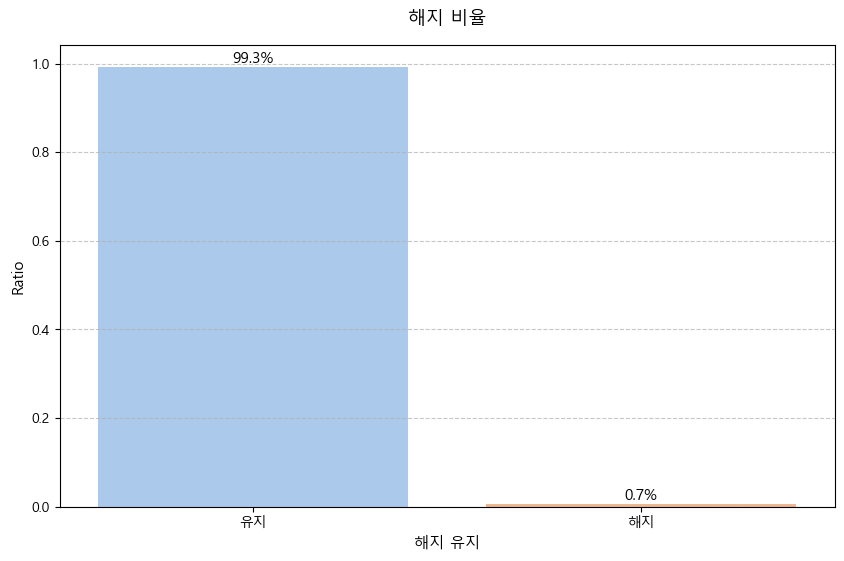

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=df_final['cancel_yn'].value_counts(normalize=True).index, 
                 y=df_final['cancel_yn'].value_counts(normalize=True).values,
                 palette='pastel')

plt.title('해지 비율', fontsize=13, pad=15)
plt.xlabel('해지 유지', fontsize=11)
plt.ylabel('Ratio', fontsize=11)

# 막대 위에 퍼센트 표시
for i, v in enumerate(df_final['cancel_yn'].value_counts(normalize=True)):
    ax.text(i, v, f'{v:.1%}', ha='center', va='bottom', fontsize=11)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [3]:
df_making = pd.read_csv("data/TPS_cancel_202302_202312.csv")

In [4]:
df = df_making

In [5]:
df.columns

Index(['sha2_hash', 'SVC_USE_DAYS_GRP', 'MEDIA_NM_GRP', 'PROD_NM_GRP',
       'PROD_OLD_YN', 'PROD_ONE_PLUS_YN', 'AGMT_KIND_NM', 'STB_RES_1M_YN',
       'SVOD_SCRB_CNT_GRP', 'PAID_CHNL_CNT_GRP', 'SCRB_PATH_NM_GRP',
       'INHOME_RATE', 'AGMT_END_SEG', 'AGMT_END_YMD', 'TOTAL_USED_DAYS',
       'TV_SCRB', 'ANALOG_SCRB', 'DIGITAL_SCRB', 'TOTAL_INTERNET_SCRB',
       'GIGA_INTERNET_SCRB', 'BUNDLE_YN', 'DIGITAL_GIGA_YN', 'DIGITAL_ALOG_YN',
       'TV_I_CNT', 'CH_LAST_DAYS_BF_GRP', 'VOC_TOTAL_MONTH1_YN',
       'VOC_STOP_CANCEL_MONTH1_YN', 'AGE_GRP10', 'EMAIL_RECV_CLS_NM',
       'SMS_SEND_CLS_NM', 'CH_HH_AVG_MONTH1', 'CH_25_RATIO_MONTH1',
       'CH_25_RATIO_MEAN_3MM', 'CH_FAV_RNK1', 'KIDS_USE_PV_MONTH1',
       'NFX_USE_YN', 'YTB_USE_YN', 'p_mt', 'churn'],
      dtype='object')

In [10]:
df[(df['SVC_USE_DAYS_GRP'] == '6개월미만') & (df['MEDIA_NM_GRP'] == 'UHD') 
   & (df['PROD_NM_GRP'] == '베이직') & (df['PROD_OLD_YN'] == 'N')
   & (df['PROD_ONE_PLUS_YN'] == 'N') & (df['AGMT_KIND_NM'] == '신규')
   & (df['STB_RES_1M_YN'] == 'Y') & (df['PROD_ONE_PLUS_YN'] == 'N')
   & (df['AGMT_END_YMD'] == '20260326') & (df['TOTAL_USED_DAYS'] == 4)
   & (df['SCRB_PATH_NM_GRP'] == '현장경로') & (df['AGE_GRP10'] == '30대') & (df['EMAIL_RECV_CLS_NM'] == '수신')]

,sha2_hash,SVC_USE_DAYS_GRP,MEDIA_NM_GRP,PROD_NM_GRP,PROD_OLD_YN,PROD_ONE_PLUS_YN,AGMT_KIND_NM,STB_RES_1M_YN,SVOD_SCRB_CNT_GRP,PAID_CHNL_CNT_GRP,SCRB_PATH_NM_GRP,INHOME_RATE,AGMT_END_SEG,AGMT_END_YMD,TOTAL_USED_DAYS,TV_SCRB,ANALOG_SCRB,DIGITAL_SCRB,TOTAL_INTERNET_SCRB,GIGA_INTERNET_SCRB,BUNDLE_YN,DIGITAL_GIGA_YN,DIGITAL_ALOG_YN,TV_I_CNT,CH_LAST_DAYS_BF_GRP,VOC_TOTAL_MONTH1_YN,VOC_STOP_CANCEL_MONTH1_YN,AGE_GRP10,EMAIL_RECV_CLS_NM,SMS_SEND_CLS_NM,CH_HH_AVG_MONTH1,CH_25_RATIO_MONTH1,CH_25_RATIO_MEAN_3MM,CH_FAV_RNK1,KIDS_USE_PV_MONTH1,NFX_USE_YN,YTB_USE_YN,p_mt,churn
15833165,b4471abfefa1ba48481773fa1e09abb0fc85cafb6c8816e5e1fce3c6b5271965,6개월미만,UHD,베이직,N,N,신규,Y,0건,0건,현장경로,0.0,약정만료전 12개월이상,20260326,4,1.00,0.00,1.00,1.00,1.00,Y,Y,N,2.00,3개월내없음,Y,Y,30대,수신,수신,0.00,0.00,0.00,기타,5.00,Y,Y,3,Y
